In [1]:
# !sudo apt-get update
# !sudo apt-get install -y curl
# !curl https://packages.microsoft.com/keys/microsoft.asc | sudo apt-key add -
# !sudo curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list -o /etc/apt/sources.list.d/mssql-release.list
# !sudo apt-get update
# !sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18 unixodbc-dev
# !sudo apt-get install -y libgssapi-krb5-2

In [2]:
## Imports for connection with Azure SQL Database Server
import pyodbc
from sqlalchemy import create_engine

In [3]:
## Importing Libraries and Tools for EDA and predictive Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives of Data Analysis & Machine Learning:
## The Sales Director at the company is tasked with developing key sales statistics and analytical insights to empower the company Board to make informed business decisions. These analyses encompass evaluating Agent performance, assessing company revenue, expenses, and profitability, as well as **forecasting future business trends and opportunities**. Such insights serve as essential tools in steering the agency toward sustained growth and success in the dynamic entertainment landscape.

### Stablishing the connection with AZURE SQL Database Server

In [4]:
## Connection details to establish the connection

server = "qaececrm-s2.database.windows.net"
database = "QAECECRM_S2"
username = "dbadmin"
password = "DashTech1234"

## Connection String to establsifh connection
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+18+for+SQL+Server'

## Establising the connection using sqlalchemy with creat_engine
engine = create_engine(connection_string)


# **Elementary Data Analysis**

#### EDA (Exploratory Data Analysis) helps in the descriptive analysis of data, providing insights into data patterns, distributions, and relationships. It aids in understanding the structure of tables, the relationships between columns, and identifying trends, anomalies, or outliers.

# **EDA on Contract and Contract Related Tables**
- Through the understanding of the data we came to a conclusion that the contract table contains most information for us in context of predictive analysis task.

In [5]:
### Query for forming the contract table with all the relevant information about the contracts for EDA
Query_Contract = """
Select ContractId, AgentId, OfficeId, ContractStatusId, LineOfBusinessId, BlueCardId,
		LeadSourceId, ContractTypeId, IsReseller, ResellerId, EventTypeId, IsPublicEvent,
		PresenterId, PresenterTypeId, VenueName, VenuePhysicalCity, VenueCapacity, ECECommissionRate,
		IsPaid, Gross, ContractDueDate, IssueDate, CreatedDate
From [dbo].[Contract]
"""

In [6]:
### Pandas Dataframe for Contract table
Contract_df = pd.read_sql(Query_Contract, engine)
Contract_df.head(5) 

,ContractId,AgentId,OfficeId,ContractStatusId,LineOfBusinessId,BlueCardId,LeadSourceId,ContractTypeId,IsReseller,ResellerId,...,PresenterTypeId,VenueName,VenuePhysicalCity,VenueCapacity,ECECommissionRate,IsPaid,Gross,ContractDueDate,IssueDate,CreatedDate
0,100304,0,17.0,3,2.0,NaN,3.0,1.0,True,40054.0,...,20.0,CASTAWAY,RICHMOND,NaN,NaN,False,1700.0,2001-11-17,1988-09-15,1988-09-15
1,101731,419,1.0,6,3.0,NaN,5.0,1.0,True,40054.0,...,20.0,"DAYS INN, 5221 BROOK ROAD, RICHMOND, VIRGINIA",RICHMOND,NaN,NaN,False,550.0,1989-02-10,1989-01-03,1989-01-03
2,103324,0,1.0,4,3.0,NaN,5.0,1.0,False,NaN,...,20.0,GODFATHER LOUNGE,COLONIAL HEIGHTS,NaN,NaN,False,2000.0,1989-05-05,2001-04-28,2001-04-28
3,103331,313,1.0,5,3.0,NaN,5.0,1.0,True,40045.0,...,49.0,"KAPPA SIGMA FRATERNITY, WASHINGTON & LEE UNIVE...",LEXINGTON,NaN,NaN,True,1500.0,1989-05-13,1989-04-28,1989-04-28
4,103526,0,1.0,3,3.0,NaN,5.0,1.0,False,NaN,...,99.0,RICHMOD MARRIOTT,RICHMOND,NaN,NaN,False,1000.0,1990-10-30,1989-05-15,1989-05-15


### **Data Overview**

#### 1. Preprocessing the table for analysis of table

In [7]:
Contract_df.describe()

,ContractId,AgentId,OfficeId,ContractStatusId,LineOfBusinessId,BlueCardId,LeadSourceId,ContractTypeId,ResellerId,EventTypeId,PresenterId,PresenterTypeId,VenueCapacity,ECECommissionRate,Gross,ContractDueDate,IssueDate,CreatedDate
count,303633.000000,3.036330e+05,301890.000000,303633.000000,301890.000000,30935.000000,301890.000000,301890.000000,12963.000000,302828.000000,3.021480e+05,302148.000000,3.700000e+03,37494.000000,3.018460e+05,301744,296848,303633
mean,337239.987554,1.462605e+04,5.740253,4.379975,2.963440,719274.848198,2.956888,1.012332,43422.889223,26.261994,6.287918e+06,38.625763,3.568340e+03,214.629114,3.711031e+03,2004-08-27 20:47:16.343390208,2004-04-27 10:11:55.118830336,2004-09-09 20:20:21.869190528
min,100304.000000,0.000000e+00,1.000000,1.000000,1.000000,20388.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000e+00,0.000000,0.000000e+00,1988-02-18 00:00:00,1988-02-03 00:00:00,1988-02-03 00:00:00
25%,185904.000000,2.030000e+02,4.000000,4.000000,3.000000,806567.500000,3.000000,1.000000,40395.000000,11.000000,3.400400e+06,13.000000,2.000000e+02,20.000000,9.250000e+02,1996-05-28 00:00:00,1996-04-03 00:00:00,1996-05-10 00:00:00
50%,270935.000000,3.130000e+02,4.000000,4.000000,3.000000,825491.000000,3.000000,1.000000,41048.000000,24.000000,6.985950e+06,39.000000,3.000000e+02,20.000000,2.000000e+03,2002-06-07 00:00:00,2002-02-12 00:00:00,2002-06-26 00:00:00
75%,351209.000000,4.170000e+02,8.000000,5.000000,3.000000,845326.500000,3.000000,1.000000,43312.000000,36.000000,8.888888e+06,51.000000,6.920000e+02,20.000000,4.000000e+03,2012-10-16 00:00:00,2012-02-28 00:00:00,2013-01-02 00:00:00
max,847752.000000,1.000466e+06,22.000000,7.000000,4.000000,869543.000000,6.000000,2.000000,99329.000000,107.000000,1.002129e+07,99.000000,9.391608e+06,100000.000000,4.800000e+06,2024-07-20 00:00:00,2024-05-31 00:00:00,2024-06-13 15:46:35.473000
std,220543.091427,1.188006e+05,4.250698,1.068130,0.253091,246828.832851,1.197864,0.110364,10365.016474,22.660000,3.043276e+06,28.465940,1.544331e+05,1363.809490,1.570029e+04,NaN,NaN,NaN


#### 2. Insights from .info() operation on the contract_df table
##### Following tables contain null value

In [8]:
C_info = Contract_df.notnull().sum()
filtered_columns = C_info[C_info < 303633]
print(filtered_columns)

OfficeId             301890
LineOfBusinessId     301890
BlueCardId            30935
LeadSourceId         301890
ContractTypeId       301890
IsReseller           301890
ResellerId            12963
EventTypeId          302828
IsPublicEvent        302827
PresenterId          302148
PresenterTypeId      302148
VenueCapacity          3700
ECECommissionRate     37494
IsPaid               274046
Gross                301846
ContractDueDate      301744
IssueDate            296848
dtype: int64


### **Handeling Missing Values**

#### 3. Providing a dummy value (-1) to columns containing BlueCradId and ResellerId with lot of null values, to identify them and use them for EDA.

In [9]:
### Id columns with null values in them > 5% of total values
print(Contract_df["BlueCardId"].unique())
print(Contract_df["ResellerId"].unique())

[    nan 111654. 111691. ... 869540. 869542. 869543.]
[4.0054e+04        nan 4.0045e+04 4.1072e+04 4.0521e+04 4.0057e+04
 4.0451e+04 4.0048e+04 4.0366e+04 4.0096e+04 4.0022e+04 4.3140e+04
 4.0072e+04 4.0488e+04 4.0522e+04 4.0498e+04 4.0093e+04 4.1027e+04
 4.0469e+04 4.0131e+04 4.0556e+04 4.0542e+04 4.0091e+04 4.0166e+04
 4.0038e+04 4.0424e+04 4.3800e+04 4.0544e+04 4.0037e+04 4.0165e+04
 4.0480e+04 4.0545e+04 4.0430e+04 4.0349e+04 4.0547e+04 4.0392e+04
 4.0089e+04 4.0548e+04 4.0090e+04 4.0404e+04 4.0146e+04 4.0549e+04
 4.0551e+04 4.0172e+04 4.0015e+04 4.0487e+04 4.8042e+04 4.0136e+04
 4.0554e+04 4.0555e+04 4.0478e+04 4.0079e+04 4.0516e+04 4.0557e+04
 4.0558e+04 4.0559e+04 4.0007e+04 4.0562e+04 4.1099e+04 4.0563e+04
 4.0505e+04 4.0564e+04 4.0565e+04 4.0125e+04 4.0444e+04 4.0138e+04
 4.0530e+04 4.1033e+04 4.0051e+04 4.3300e+04 4.0289e+04 4.0567e+04
 4.0147e+04 4.0570e+04 4.0395e+04 4.0569e+04 4.0571e+04 4.0568e+04
 4.0500e+04 4.0574e+04 4.0475e+04 4.0577e+04 4.0588e+04 4.0579e+04
 4.0580e

In [10]:
### Assigning the null values as -1 for Ids to identify the null values
Contract_df["BlueCardId"] = Contract_df["BlueCardId"].fillna(-1)
Contract_df["ResellerId"] = Contract_df["ResellerId"].fillna(-1)

In [11]:
print("BlueCardId not null: ",Contract_df["BlueCardId"].notnull().sum())
print("ResellerId not null",Contract_df["ResellerId"].notnull().sum())

BlueCardId not null:  303633
ResellerId not null 303633


#### 4. Dealing with null values of columns with numerical values

In [12]:
### numerical values columns with nulll values > 5% of the total values

num_columns = ["VenueCapacity", "ECECommissionRate", "Gross", "IsPaid"]
Contract_df[num_columns].describe()

,VenueCapacity,ECECommissionRate,Gross
count,3.700000e+03,37494.000000,3.018460e+05
mean,3.568340e+03,214.629114,3.711031e+03
std,1.544331e+05,1363.809490,1.570029e+04
min,1.000000e+00,0.000000,0.000000e+00
25%,2.000000e+02,20.000000,9.250000e+02
50%,3.000000e+02,20.000000,2.000000e+03
75%,6.920000e+02,20.000000,4.000000e+03
max,9.391608e+06,100000.000000,4.800000e+06


In [13]:
# Calculate median
median = Contract_df[num_columns].median()
median

VenueCapacity         300.0
ECECommissionRate      20.0
Gross                2000.0
IsPaid                  0.0
dtype: object

In [14]:
# Calculate mode (for each column, Pandas returns a DataFrame since there can be multiple modes)
mode = Contract_df[num_columns].mode().iloc[0]
mode

VenueCapacity         300.0
ECECommissionRate      20.0
Gross                1500.0
IsPaid                False
Name: 0, dtype: object

#### 5. Addigning values to the columns with numerical value.
- Looking at the Columns Like VenueCapacity and ECECommisionRate, we can make an assumption for the null values from the mode of these columns
- The mode of the respective columns were assigned to the null values

In [15]:
Contract_df["VenueCapacity"] = Contract_df["VenueCapacity"].fillna(300)
Contract_df["ECECommissionRate"] = Contract_df["ECECommissionRate"].fillna(20)
Contract_df["IsPaid"]=Contract_df["IsPaid"].fillna(False)

/tmp/ipykernel_3790/1706647371.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Contract_df["IsPaid"]=Contract_df["IsPaid"].fillna(False)


- The Column OriginalGross was dropped because it has less than 10% non null values and having less significance.

In [16]:
Contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303633 entries, 0 to 303632
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ContractId         303633 non-null  int64         
 1   AgentId            303633 non-null  int64         
 2   OfficeId           301890 non-null  float64       
 3   ContractStatusId   303633 non-null  int64         
 4   LineOfBusinessId   301890 non-null  float64       
 5   BlueCardId         303633 non-null  float64       
 6   LeadSourceId       301890 non-null  float64       
 7   ContractTypeId     301890 non-null  float64       
 8   IsReseller         301890 non-null  object        
 9   ResellerId         303633 non-null  float64       
 10  EventTypeId        302828 non-null  float64       
 11  IsPublicEvent      302827 non-null  object        
 12  PresenterId        302148 non-null  float64       
 13  PresenterTypeId    302148 non-null  float64 

#### 6. Dropping the rows with null values 
- After dealing with the columns with lot of null values we are dropping the rows with null values in other columns which are less than 5% of the length of the columns.

In [17]:
Contract_dfCleaned = Contract_df.dropna()
Contract_dfCleaned.head(5)

,ContractId,AgentId,OfficeId,ContractStatusId,LineOfBusinessId,BlueCardId,LeadSourceId,ContractTypeId,IsReseller,ResellerId,...,PresenterTypeId,VenueName,VenuePhysicalCity,VenueCapacity,ECECommissionRate,IsPaid,Gross,ContractDueDate,IssueDate,CreatedDate
0,100304,0,17.0,3,2.0,-1.0,3.0,1.0,True,40054.0,...,20.0,CASTAWAY,RICHMOND,300.0,20.0,False,1700.0,2001-11-17,1988-09-15,1988-09-15
1,101731,419,1.0,6,3.0,-1.0,5.0,1.0,True,40054.0,...,20.0,"DAYS INN, 5221 BROOK ROAD, RICHMOND, VIRGINIA",RICHMOND,300.0,20.0,False,550.0,1989-02-10,1989-01-03,1989-01-03
2,103324,0,1.0,4,3.0,-1.0,5.0,1.0,False,-1.0,...,20.0,GODFATHER LOUNGE,COLONIAL HEIGHTS,300.0,20.0,False,2000.0,1989-05-05,2001-04-28,2001-04-28
3,103331,313,1.0,5,3.0,-1.0,5.0,1.0,True,40045.0,...,49.0,"KAPPA SIGMA FRATERNITY, WASHINGTON & LEE UNIVE...",LEXINGTON,300.0,20.0,True,1500.0,1989-05-13,1989-04-28,1989-04-28
4,103526,0,1.0,3,3.0,-1.0,5.0,1.0,False,-1.0,...,99.0,RICHMOD MARRIOTT,RICHMOND,300.0,20.0,False,1000.0,1990-10-30,1989-05-15,1989-05-15


In [18]:
Contract_dfCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296848 entries, 0 to 303631
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ContractId         296848 non-null  int64         
 1   AgentId            296848 non-null  int64         
 2   OfficeId           296848 non-null  float64       
 3   ContractStatusId   296848 non-null  int64         
 4   LineOfBusinessId   296848 non-null  float64       
 5   BlueCardId         296848 non-null  float64       
 6   LeadSourceId       296848 non-null  float64       
 7   ContractTypeId     296848 non-null  float64       
 8   IsReseller         296848 non-null  object        
 9   ResellerId         296848 non-null  float64       
 10  EventTypeId        296848 non-null  float64       
 11  IsPublicEvent      296848 non-null  object        
 12  PresenterId        296848 non-null  float64       
 13  PresenterTypeId    296848 non-null  float64      

### **EDA By Visualization**  

In [19]:
## Listing all the Categorical Columns with less Categories < 20
SCategorical_Columns = ["IsReseller", "IsPublicEvent", "IsPaid", "LineOfBusinessId", "ContractStatusId", "LeadSourceId", "ContractTypeId"]

In [20]:
Contract_dfCleaned[SCategorical_Columns].head(5)

,IsReseller,IsPublicEvent,IsPaid,LineOfBusinessId,ContractStatusId,LeadSourceId,ContractTypeId
0,True,False,False,2.0,3,3.0,1.0
1,True,False,False,3.0,6,5.0,1.0
2,False,False,False,3.0,4,5.0,1.0
3,True,False,True,3.0,5,5.0,1.0
4,False,False,False,3.0,3,5.0,1.0


In [21]:
## Listing all the categorical columns with more categories >= 20
BCategorical_Columns = ["AgentId", "OfficeId", "BlueCardId", "VenueName", "VenuePhysicalCity", "EventTypeId", "PresenterTypeId"]

In [22]:
Contract_dfCleaned[BCategorical_Columns].head(5)

,AgentId,OfficeId,BlueCardId,VenueName,VenuePhysicalCity,EventTypeId,PresenterTypeId
0,0,17.0,-1.0,CASTAWAY,RICHMOND,8.0,20.0
1,419,1.0,-1.0,"DAYS INN, 5221 BROOK ROAD, RICHMOND, VIRGINIA",RICHMOND,8.0,20.0
2,0,1.0,-1.0,GODFATHER LOUNGE,COLONIAL HEIGHTS,8.0,20.0
3,313,1.0,-1.0,"KAPPA SIGMA FRATERNITY, WASHINGTON & LEE UNIVE...",LEXINGTON,19.0,49.0
4,0,1.0,-1.0,RICHMOD MARRIOTT,RICHMOND,26.0,99.0


In [23]:
## Listing all the numerical value columns
Numerical_Columns = ["VenueCapacity", "ECECommissionRate", "Gross"]

In [24]:
Contract_dfCleaned[Numerical_Columns].head(5)

,VenueCapacity,ECECommissionRate,Gross
0,300.0,20.0,1700.0
1,300.0,20.0,550.0
2,300.0,20.0,2000.0
3,300.0,20.0,1500.0
4,300.0,20.0,1000.0


In [25]:
DateType_Columns = ["ContractDueDate","IssueDate","CreatedDate"]

In [26]:
Contract_dfCleaned[DateType_Columns].head(5)

,ContractDueDate,IssueDate,CreatedDate
0,2001-11-17,1988-09-15,1988-09-15
1,1989-02-10,1989-01-03,1989-01-03
2,1989-05-05,2001-04-28,2001-04-28
3,1989-05-13,1989-04-28,1989-04-28
4,1990-10-30,1989-05-15,1989-05-15


#### 1. Distributive Analysis
Distribution analysis helps understand how individual variables are spread across their possible values, particularly numerical ones.
- **Histograms:**
    - **Purpose:**  Used to visualize the frequency distribution of a single numerical value.
- **Density Plots:** 
    - **Purpose:**  Used to estimate the probability density function of a continuous Variable.
- **Box Plots:**
    - **Purpose:** Used to display the distribution of data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

In [27]:
Contract_dfCleaned['Gross'].value_counts()


Gross
1500.00     17059
2000.00     13800
1000.00     13186
2500.00     12211
500.00       9459
            ...  
10468.52        1
16475.00        1
22650.00        1
7580.00         1
28900.00        1
Name: count, Length: 3953, dtype: int64

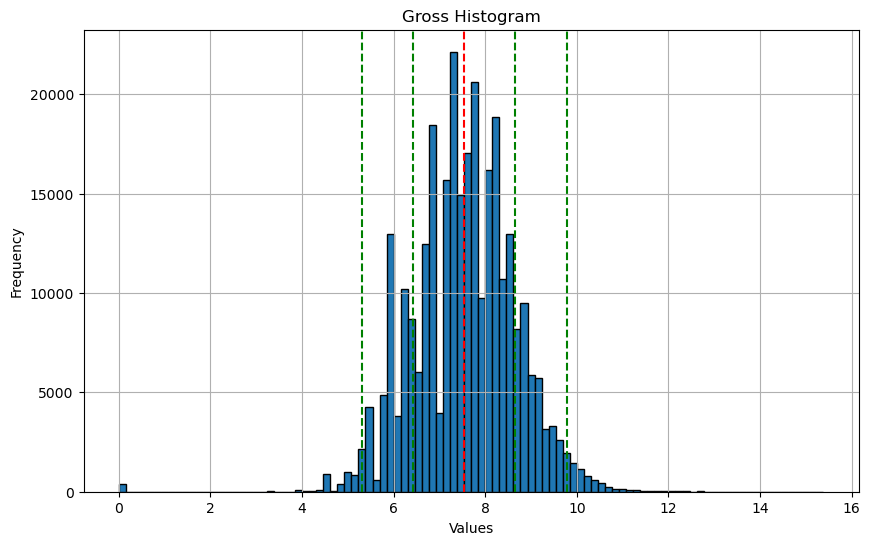

In [28]:
## Histogram
## Because the data is heavily sckewed we need to use log of the gros value for analysis.

import statistics

data = np.log(Contract_dfCleaned["Gross"] +1 )

plt.figure(figsize=(10,6))
plt.hist(data, bins=100, edgecolor='black', density=False)
m = statistics.mean(data)
sd = statistics.stdev(data)

plt.axvline(m, color="red", linestyle = "dashed")
plt.axvline(m + sd, color="g", linestyle = "dashed")
plt.axvline(m - sd, color="g", linestyle = "dashed")
plt.axvline(m + 2*sd, color="g", linestyle = "dashed")
plt.axvline(m - 2*sd, color="g", linestyle = "dashed")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Gross Histogram")
plt.grid(True)
plt.show()

#### SCategorical_Columns bar plot

In [29]:
# Count occurrences of each category in 'LineOfBusinessId'

query_LineOfBusinessId = """
Select LineOfBusinessId, Name From dbo.LuLineOfBusiness
"""
LineOfBusiness = pd.read_sql(query_LineOfBusinessId, engine)

line_of_business_counts = Contract_dfCleaned["LineOfBusinessId"].value_counts()

line_of_business_counts_df = pd.DataFrame({
    'LineOfBusinessId': line_of_business_counts.index,
    'Frequency': line_of_business_counts.values
})

# Merge to get the names associated with each LineOfBusinessId
merged_lob_df = pd.merge(line_of_business_counts_df, LineOfBusiness, on='LineOfBusinessId')

In [30]:
query_ContractStatusId = """
SELECT ContractStatusId, Name FROM dbo.LuContractStatus
"""
ContractStatus = pd.read_sql(query_ContractStatusId, engine)

contract_status_counts = Contract_dfCleaned["ContractStatusId"].value_counts()

contract_status_counts_df = pd.DataFrame({
    'ContractStatusId': contract_status_counts.index,
    'Frequency': contract_status_counts.values
})

merged_contract_status_df = pd.merge(contract_status_counts_df, ContractStatus, on='ContractStatusId')


In [31]:
query_LeadSourceId = """
SELECT LeadSourceId, Name FROM dbo.LuLeadSource
"""
LeadSource = pd.read_sql(query_LeadSourceId, engine)

lead_source_counts = Contract_dfCleaned["LeadSourceId"].value_counts()

lead_source_counts_df = pd.DataFrame({
    'LeadSourceId': lead_source_counts.index,
    'Frequency': lead_source_counts.values
})

merged_lead_source_df = pd.merge(lead_source_counts_df, LeadSource, on='LeadSourceId')


In [32]:
query_ContractTypeId = """
SELECT ContractTypeId, Name FROM dbo.LuContractType
"""
ContractType = pd.read_sql(query_ContractTypeId, engine)

contract_type_counts = Contract_dfCleaned["ContractTypeId"].value_counts()

contract_type_counts_df = pd.DataFrame({
    'ContractTypeId': contract_type_counts.index,
    'Frequency': contract_type_counts.values
})

merged_contract_type_df = pd.merge(contract_type_counts_df, ContractType, on='ContractTypeId')


In [33]:
# Count occurrences of True and False for IsReseller, IsPublicEvent, and IsPaid
reseller_counts = Contract_dfCleaned["IsReseller"].value_counts()
public_event_counts = Contract_dfCleaned["IsPublicEvent"].value_counts()
paid_counts = Contract_dfCleaned["IsPaid"].value_counts()

#### Plots for SCategory_Columns

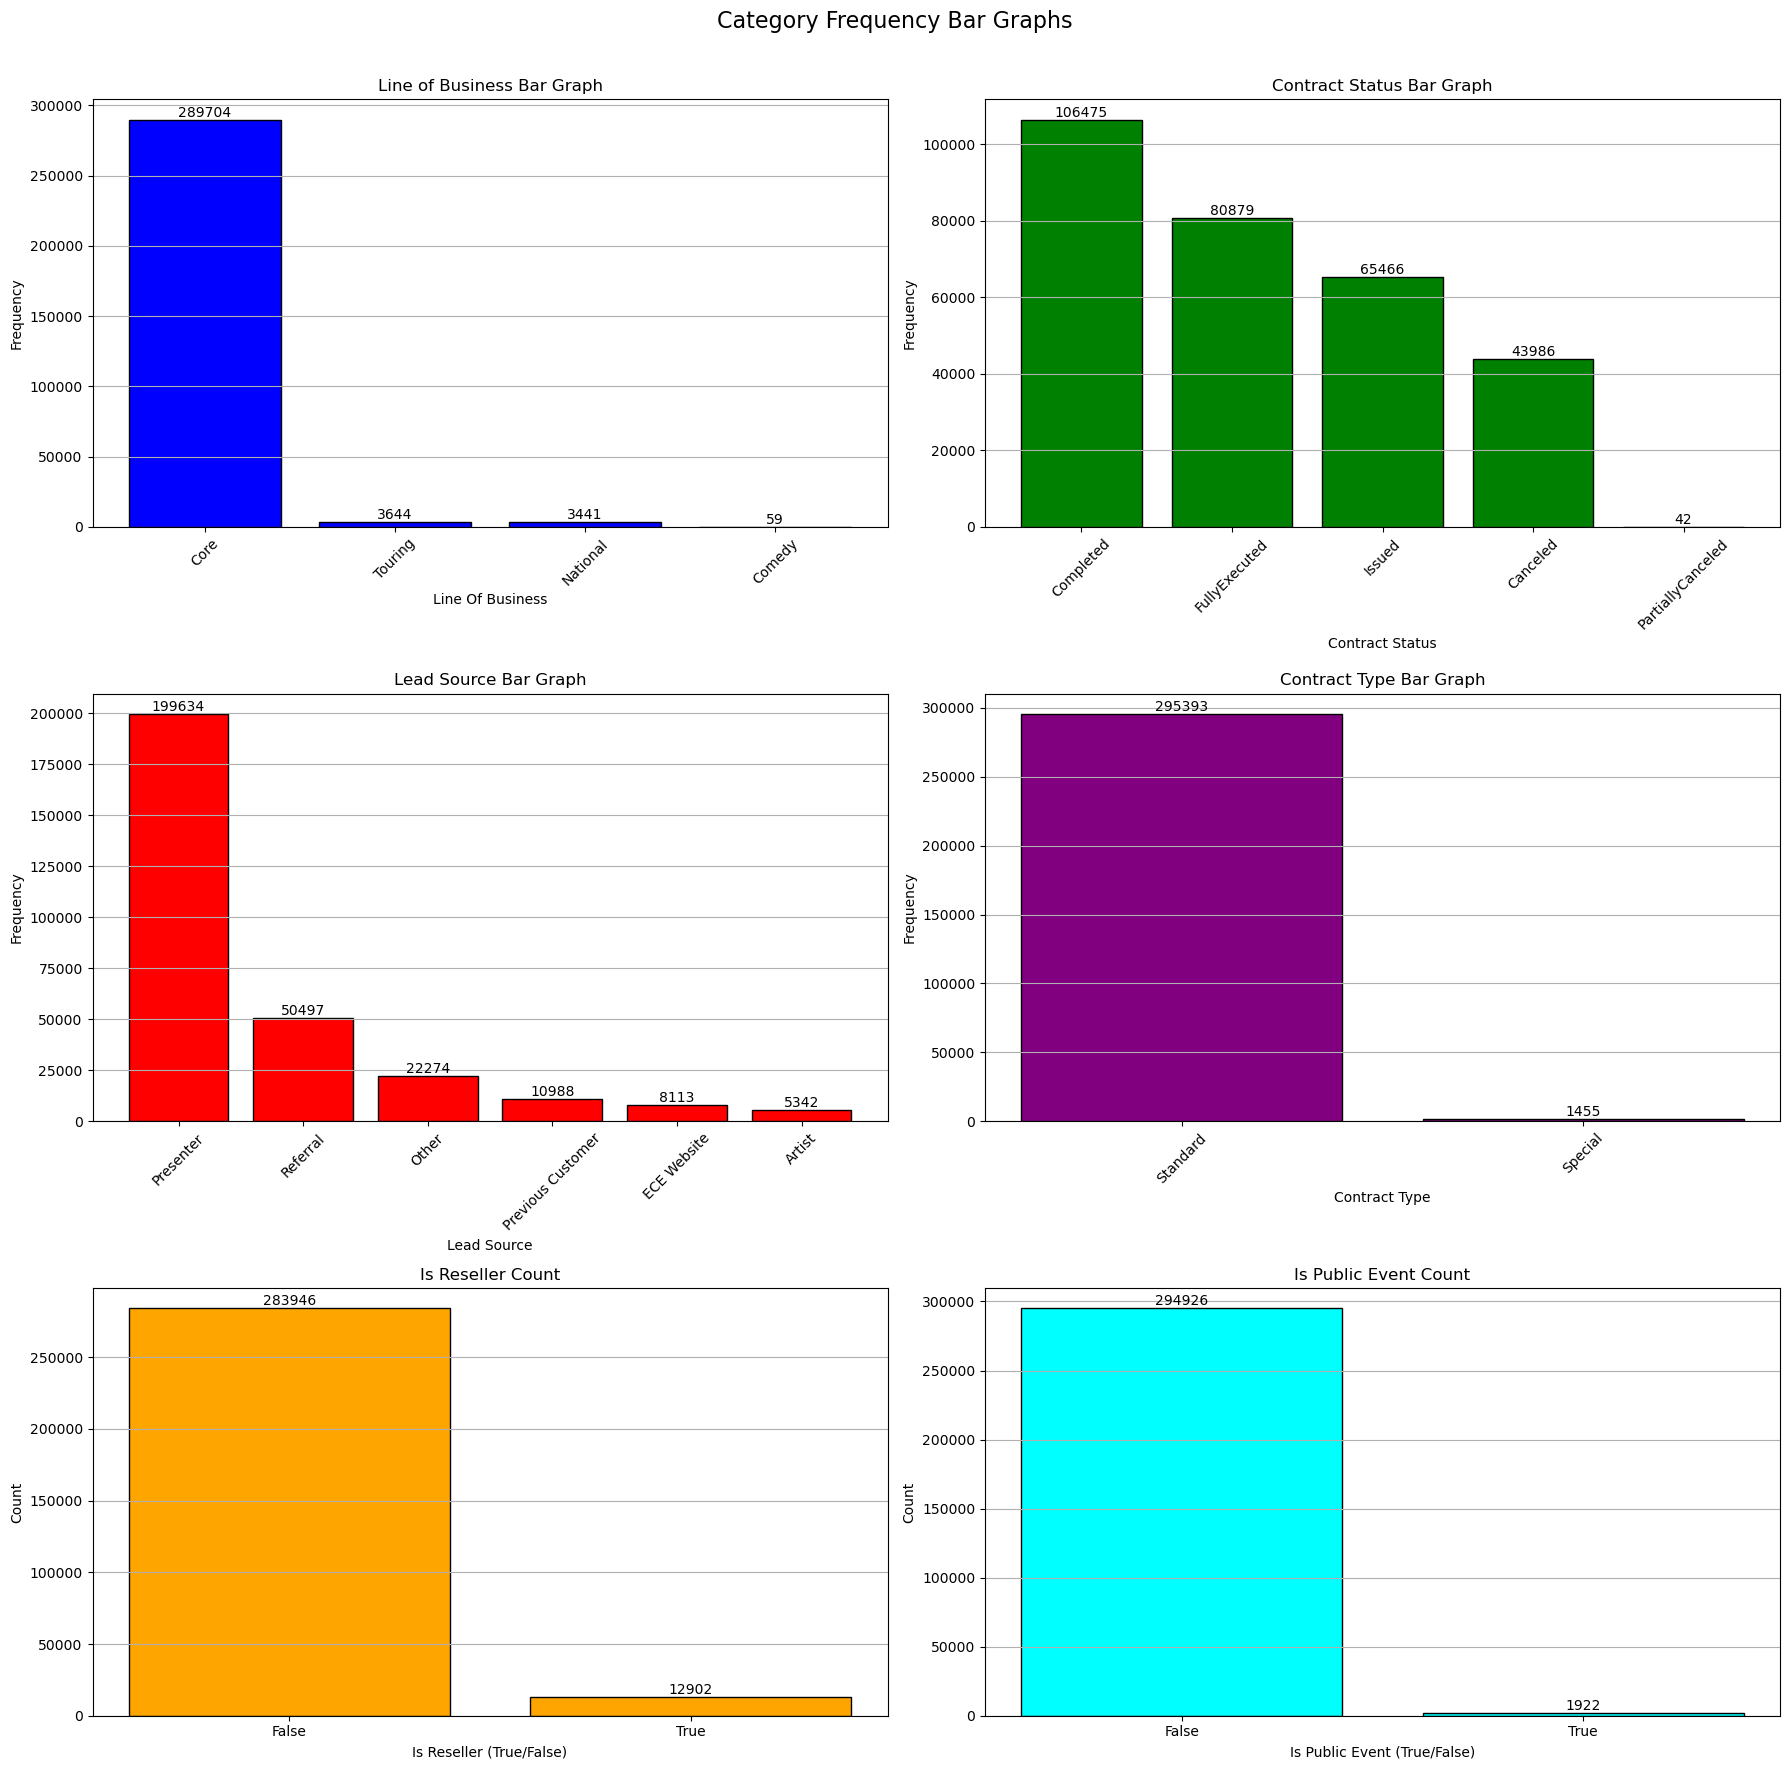

In [34]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns of plots
fig.suptitle('Category Frequency Bar Graphs', fontsize=16)

# Function to add labels on bars
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height,
                f'{int(height)}', ha='center', va='bottom')

# Plot for Line of Business
bars = axes[0, 0].bar(merged_lob_df["Name"], merged_lob_df["Frequency"], color="blue", edgecolor='black')
axes[0, 0].set_xlabel("Line Of Business")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Line of Business Bar Graph")
axes[0, 0].grid(True, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)
add_labels(axes[0, 0], bars)

# Plot for Contract Status
bars = axes[0, 1].bar(merged_contract_status_df["Name"], merged_contract_status_df["Frequency"], color="green", edgecolor='black')
axes[0, 1].set_xlabel("Contract Status")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Contract Status Bar Graph")
axes[0, 1].grid(True, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)
add_labels(axes[0, 1], bars)

# Plot for Lead Source
bars = axes[1, 0].bar(merged_lead_source_df["Name"], merged_lead_source_df["Frequency"], color="red", edgecolor='black')
axes[1, 0].set_xlabel("Lead Source")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Lead Source Bar Graph")
axes[1, 0].grid(True, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)
add_labels(axes[1, 0], bars)

# Plot for Contract Type
bars = axes[1, 1].bar(merged_contract_type_df["Name"], merged_contract_type_df["Frequency"], color="purple", edgecolor='black')
axes[1, 1].set_xlabel("Contract Type")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Contract Type Bar Graph")
axes[1, 1].grid(True, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)
add_labels(axes[1, 1], bars)

# Plot for IsReseller
bars = axes[2, 0].bar(reseller_counts.index.astype(str), reseller_counts.values, color="orange", edgecolor='black')
axes[2, 0].set_xlabel("Is Reseller (True/False)")
axes[2, 0].set_ylabel("Count")
axes[2, 0].set_title("Is Reseller Count")
axes[2, 0].grid(True, axis='y')
add_labels(axes[2, 0], bars)

# Plot for IsPublicEvent
bars = axes[2, 1].bar(public_event_counts.index.astype(str), public_event_counts.values, color="cyan", edgecolor='black')
axes[2, 1].set_xlabel("Is Public Event (True/False)")
axes[2, 1].set_ylabel("Count")
axes[2, 1].set_title("Is Public Event Count")
axes[2, 1].grid(True, axis='y')
add_labels(axes[2, 1], bars)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust space to fit the overall title
plt.show()


### Insights from plots of tables with less categorical values.
- #### **Line of Business Bar:** We can see that the Core Business is dominating the dominating in terms of counts thus, we can conclude that other Line of Businesses do not play a significant role.
- #### **Contract Type Bar:** We can conclude that Standard Contract type plays a significant role and special contract is rare.
- #### **IsResseller Bar & IsPublicEvent:** The Data is heavily skewed thus does not help us in predictive analysis.
- ####  We can drop all these columns as they are skewed and thus are not important for us.

In [35]:
columns_to_drop = ['LineOfBusinessId', 'ContractTypeId', 'IsReseller', 'IsPublicEvent']
Contract_dfCleaned = Contract_dfCleaned.drop(columns=columns_to_drop)

#### BCategorical_Columns bar plot for top 20 values

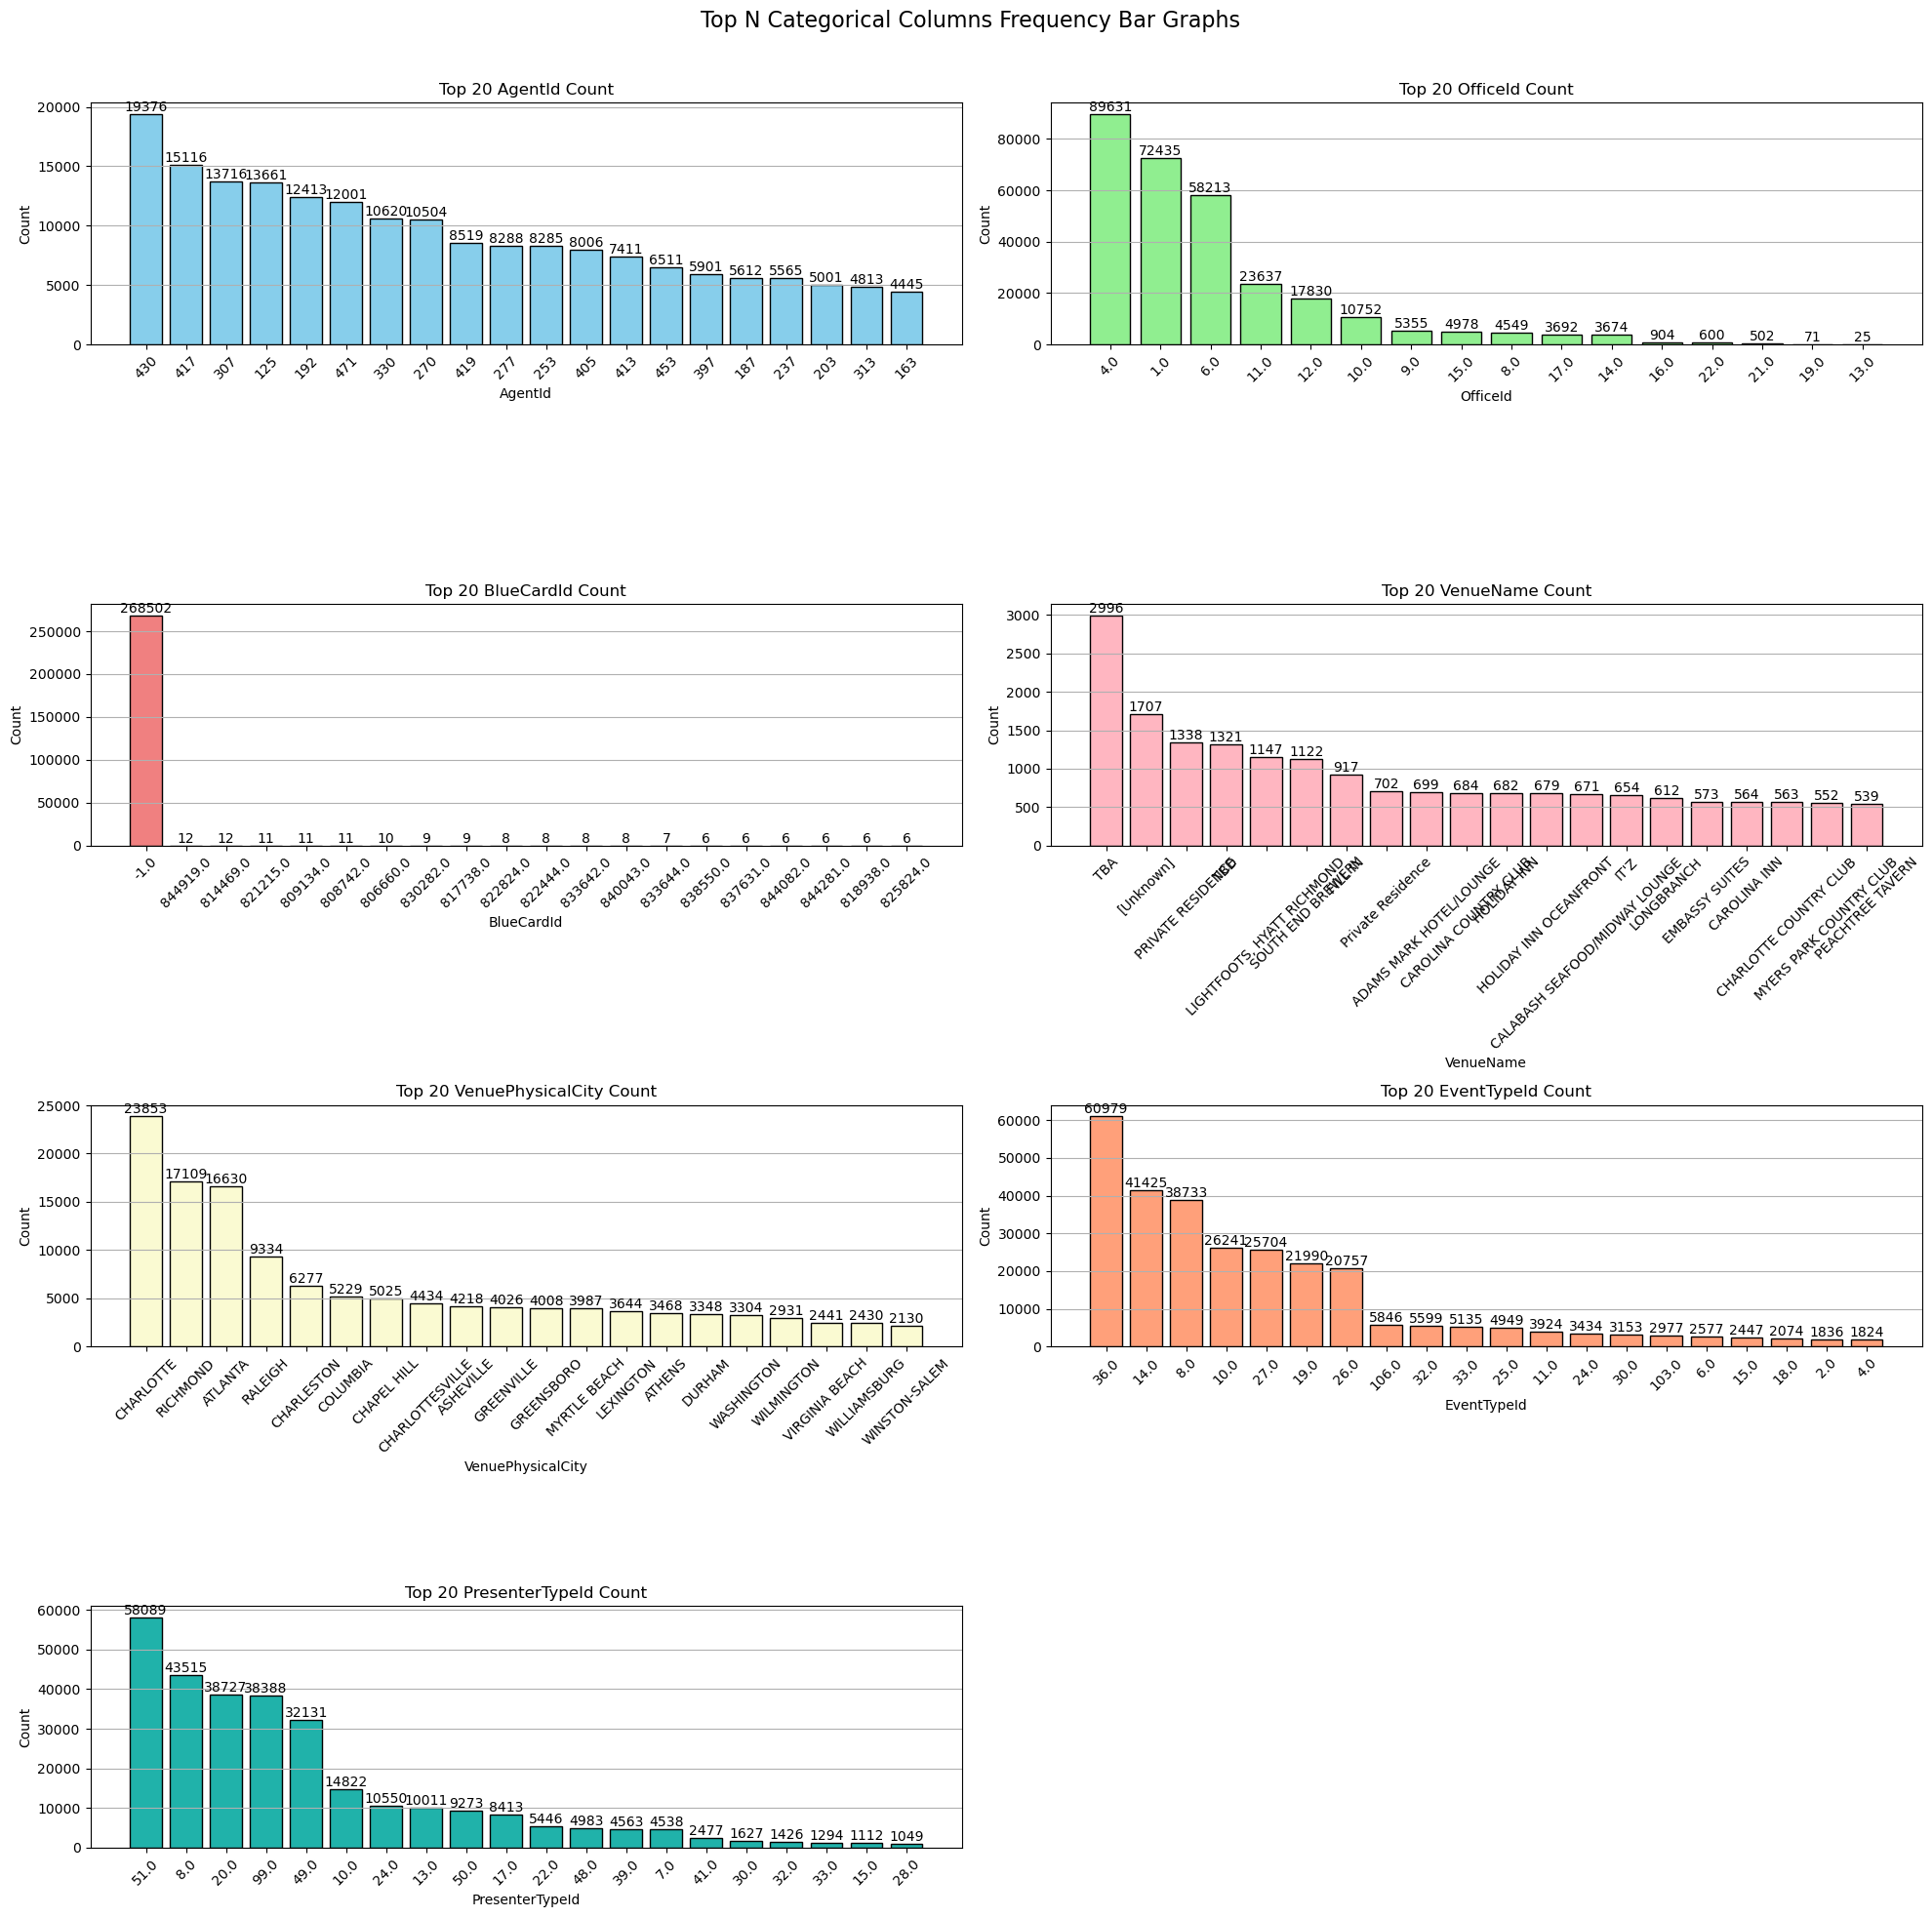

In [36]:
# Number of top categories to plot (you can adjust this number)
TOP_N = 20

# List of colors to apply to each plot
colors = ["skyblue", "lightgreen", "lightcoral", "lightpink", "lightgoldenrodyellow", "lightsalmon", "lightseagreen"]

# Set up the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns of plots (we have 7 columns, so one will be empty)
fig.suptitle('Top N Categorical Columns Frequency Bar Graphs', fontsize=16)

# Function to add labels on bars
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height,
                f'{int(height)}', ha='center', va='bottom')

# Plot for each categorical column (limit to top N categories)
for i, column in enumerate(BCategorical_Columns):
    value_counts = Contract_dfCleaned[column].value_counts().nlargest(TOP_N)  # Get top N categories
    row, col = divmod(i, 2)  # Position in the subplot grid (4x2)

    # Plot the bar chart with a different color for each plot
    bars = axes[row, col].bar(value_counts.index.astype(str), value_counts.values, color=colors[i], edgecolor='black')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Count")
    axes[row, col].set_title(f"Top {TOP_N} {column} Count")
    axes[row, col].grid(True, axis='y')
    axes[row, col].tick_params(axis='x', rotation=45)
    add_labels(axes[row, col], bars)

# Hide the last subplot (since we only need 7, but the grid has 8 slots)
axes[3, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust space to fit the overall title
plt.show()


In [37]:
Contract_dfCleaned = Contract_dfCleaned.drop(columns=["BlueCardId"], axis = 1)

#### 2. Column/Attribute Comparision

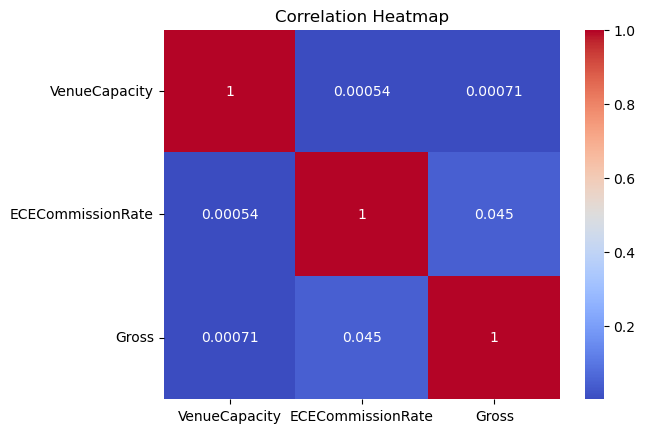

In [38]:
# Compute the correlation matrix between venue capacity, ECE Commision Rate and Gross.
corr = Contract_dfCleaned[["VenueCapacity", "ECECommissionRate", "Gross"]].corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

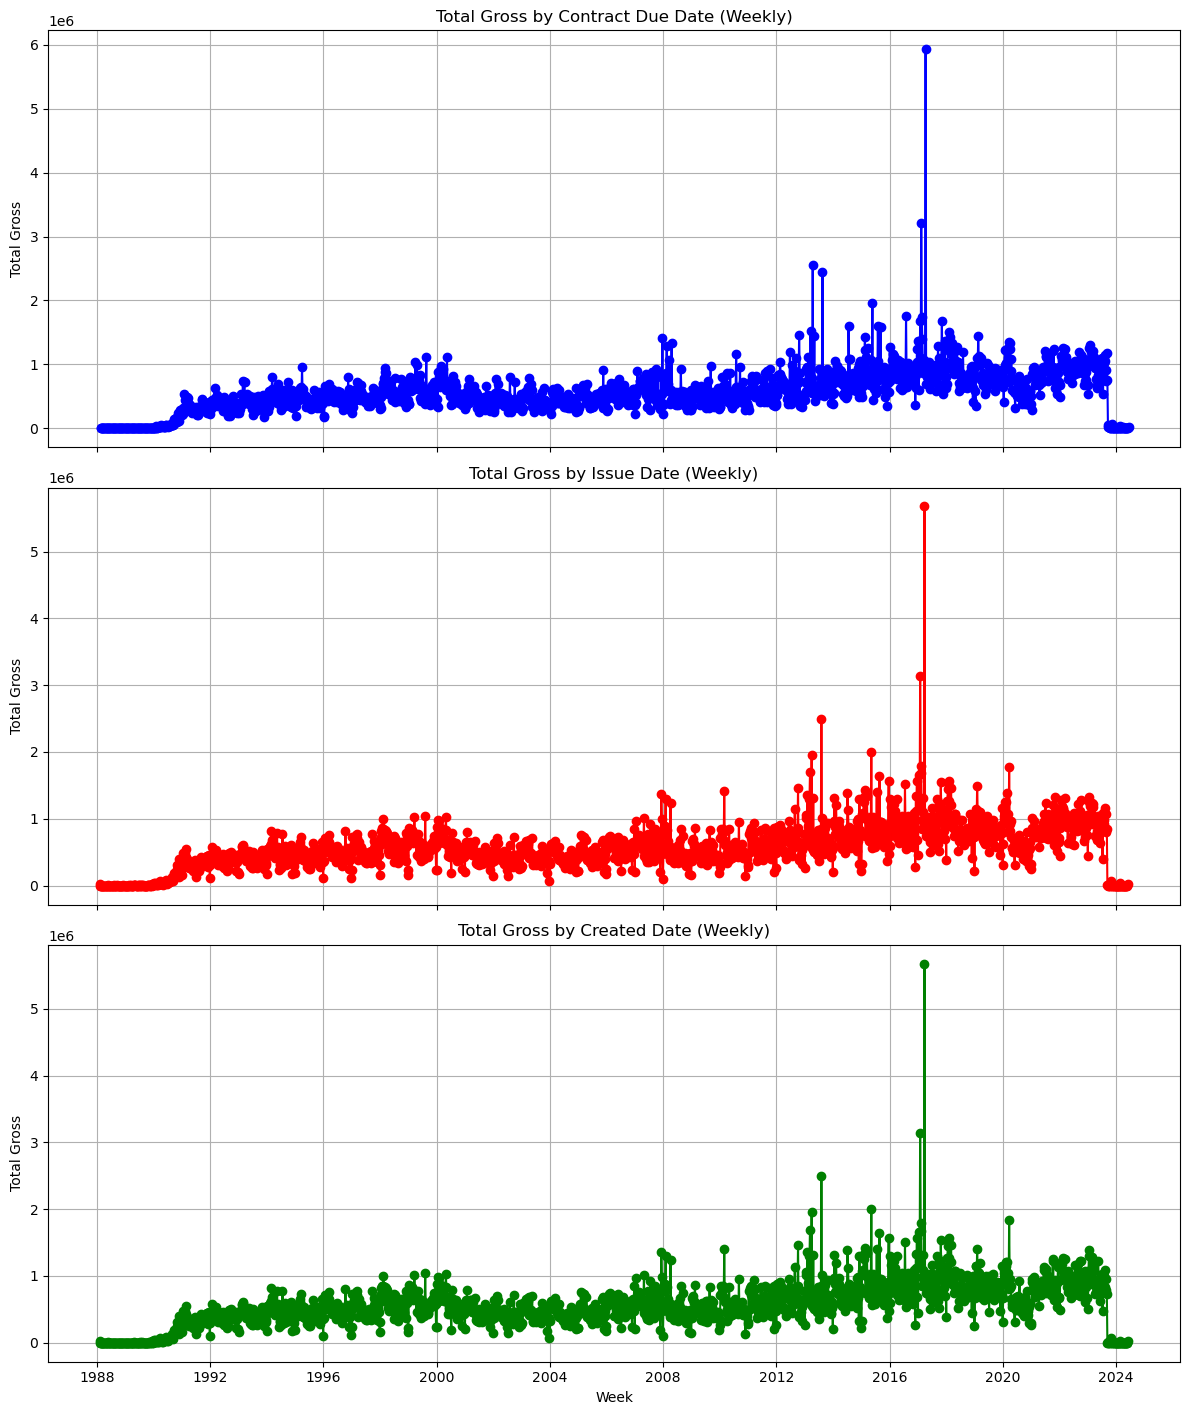

In [39]:
# Convert date columns to datetime if not already in datetime format
Contract_dfCleaned["ContractDueDate"] = pd.to_datetime(Contract_dfCleaned["ContractDueDate"])
Contract_dfCleaned["IssueDate"] = pd.to_datetime(Contract_dfCleaned["IssueDate"])
Contract_dfCleaned["CreatedDate"] = pd.to_datetime(Contract_dfCleaned["CreatedDate"])

# Group by weeks and calculate total gross for each date column
gross_by_week_due = Contract_dfCleaned.groupby(pd.Grouper(key='ContractDueDate', freq='W'))["Gross"].sum().fillna(0)
gross_by_week_issue = Contract_dfCleaned.groupby(pd.Grouper(key='IssueDate', freq='W'))["Gross"].sum().fillna(0)
gross_by_week_created = Contract_dfCleaned.groupby(pd.Grouper(key='CreatedDate', freq='W'))["Gross"].sum().fillna(0)

# Convert index (dates) and values (gross) to numpy arrays for plotting
dates_due = gross_by_week_due.index.to_pydatetime()
gross_values_due = gross_by_week_due.values.astype(float)

dates_issue = gross_by_week_issue.index.to_pydatetime()
gross_values_issue = gross_by_week_issue.values.astype(float)

dates_created = gross_by_week_created.index.to_pydatetime()
gross_values_created = gross_by_week_created.values.astype(float)

# Create stacked plots (three separate plots on top of each other)
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  # Three rows, share x-axis

# Plot for Contract Due Date
axes[0].plot(dates_due, gross_values_due, color="blue", label='Contract Due Date', marker='o')
axes[0].set_ylabel("Total Gross")
axes[0].set_title("Total Gross by Contract Due Date (Weekly)")
axes[0].grid(True)

# Plot for Issue Date
axes[1].plot(dates_issue, gross_values_issue, color="red", label='Issue Date', marker='o')
axes[1].set_ylabel("Total Gross")
axes[1].set_title("Total Gross by Issue Date (Weekly)")
axes[1].grid(True)

# Plot for Created Date
axes[2].plot(dates_created, gross_values_created, color="green", label='Created Date', marker='o')
axes[2].set_ylabel("Total Gross")
axes[2].set_xlabel("Week")
axes[2].set_title("Total Gross by Created Date (Weekly)")
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Insights from the plot 
- #### The trend for the Gross across all the Contract Due Date, Issue Date and Created Date is very similar.
- #### We can come to a conclusion to keep only one column because they do not contribute in the predictive analysis.
- #### We will only keep IssueDate and Drop the other two ContractDueDate and CreatedDate Column. 

In [40]:
Contract_dfCleaned = Contract_dfCleaned.drop(columns=["IssueDate", "CreatedDate"], axis=1)

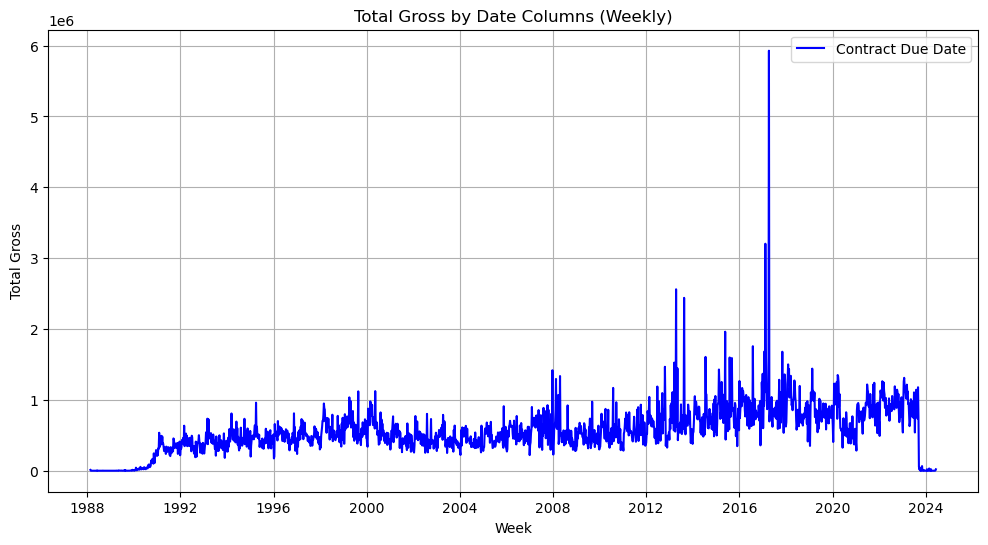

In [41]:
# Convert date columns to datetime
Contract_dfCleaned["ContractDueDate"] = pd.to_datetime(Contract_dfCleaned["ContractDueDate"])

# Group by weeks and calculate total gross for each date column
gross_by_week_due = Contract_dfCleaned.groupby(pd.Grouper(key='ContractDueDate', freq='W'))["Gross"].sum()

# Convert to numpy arrays for plotting
dates_due = gross_by_week_due.index.to_numpy()
gross_values_due = gross_by_week_due.values

# Plot multiple lines in one plot
plt.figure(figsize=(12, 6))
plt.plot(dates_due, gross_values_due, label="Contract Due Date", color="blue")
plt.xlabel("Week")
plt.ylabel("Total Gross")
plt.title("Total Gross by Date Columns (Weekly)")
plt.grid(True)
plt.legend()
plt.show()

#### Rolling Average Line Chart:

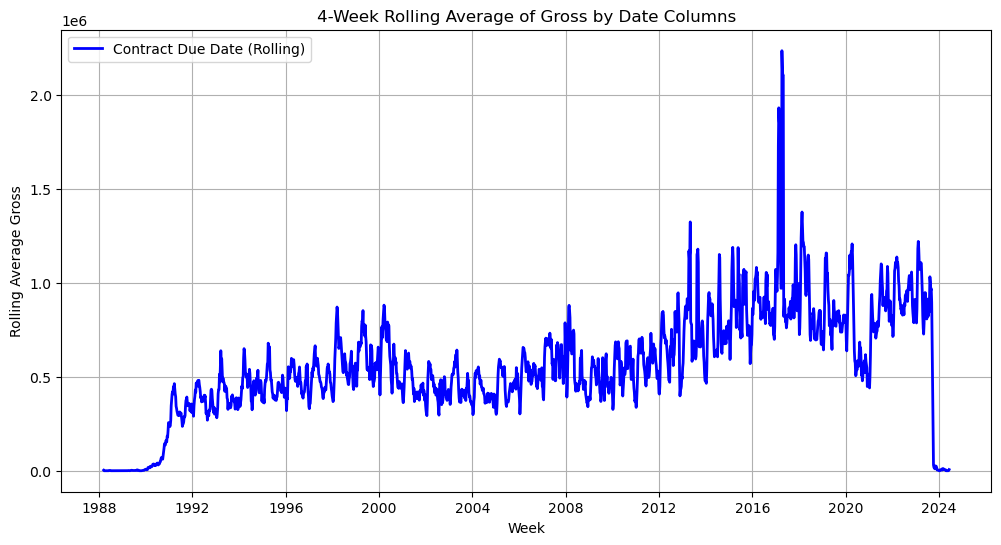

In [42]:
# Calculate rolling averages for each date column
rolling_window = 4  # 4-week rolling window

gross_by_week_due_rolling = gross_by_week_due.rolling(window=rolling_window).mean()


# Convert to numpy arrays for plotting
dates_due = gross_by_week_due_rolling.index.to_numpy()
gross_values_due_rolling = gross_by_week_due_rolling.values

# Plot the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(dates_due, gross_values_due_rolling, label="Contract Due Date (Rolling)", color="blue", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Gross")
plt.title("4-Week Rolling Average of Gross by Date Columns")
plt.grid(True)
plt.legend()
plt.show()

#### Stacked Area Chart

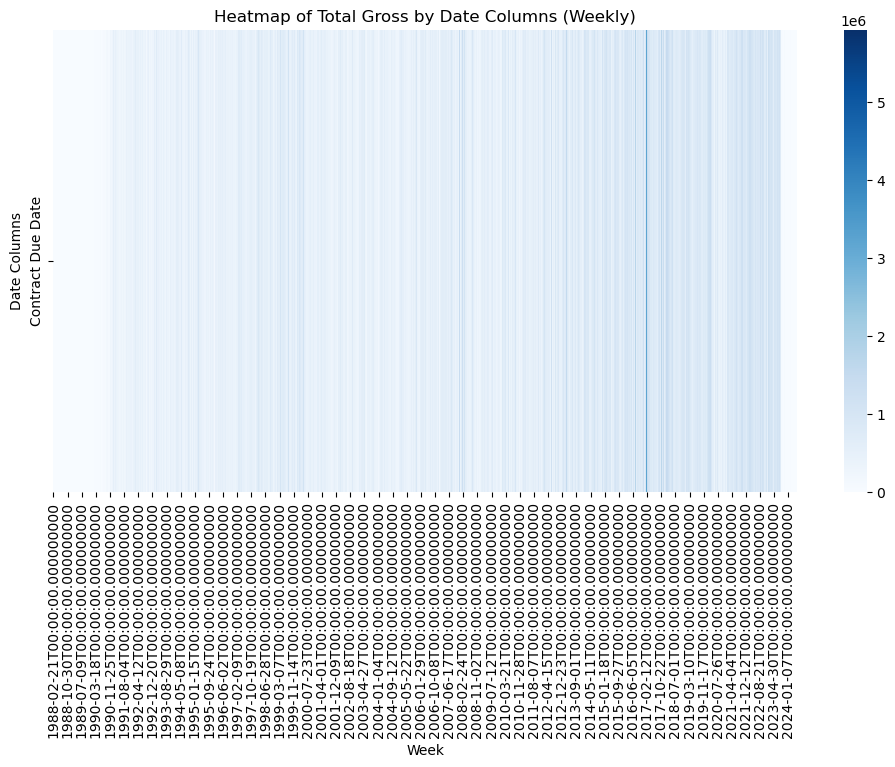

In [43]:
# Create a pivot table with weeks as rows and dates as columns
heatmap_data = pd.DataFrame({
    'Contract Due Date': gross_by_week_due,
}).fillna(0)  # Replace NaNs with 0s

# Convert index (dates) to string format for plotting in heatmap
heatmap_data.index = heatmap_data.index.to_numpy().astype(str)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="Blues", annot=False, cbar=True)
plt.title("Heatmap of Total Gross by Date Columns (Weekly)")
plt.xlabel("Week")
plt.ylabel("Date Columns")
plt.show()


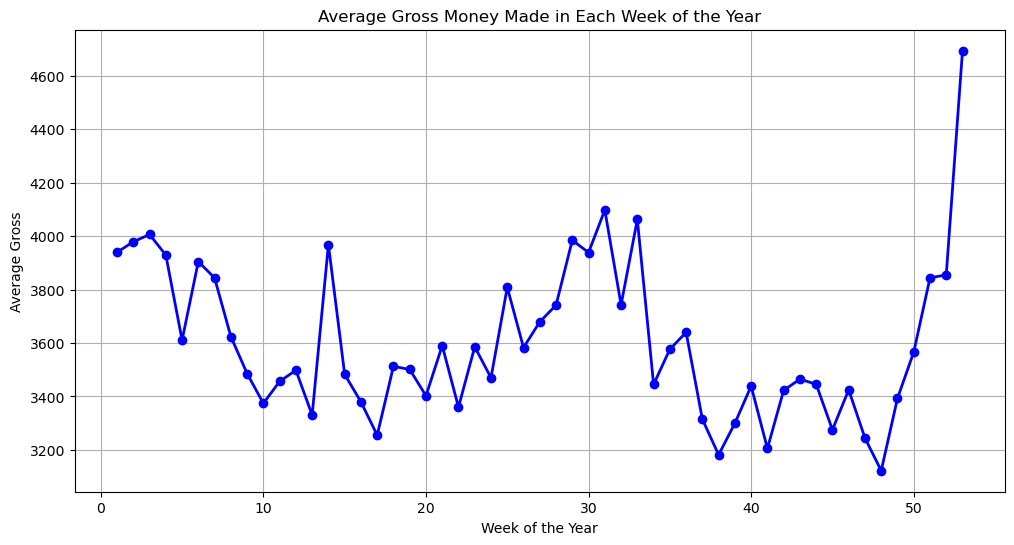

In [44]:
# Ensure the date columns are in datetime format
Contract_dfCleaned["ContractDueDate"] = pd.to_datetime(Contract_dfCleaned["ContractDueDate"], errors='coerce')

# Ensure the Gross column is numeric and handle non-numeric values
Contract_dfCleaned["Gross"] = pd.to_numeric(Contract_dfCleaned["Gross"], errors='coerce')

# Drop any rows where ContractDueDate or Gross is missing or invalid
Contract_dfCleaned = Contract_dfCleaned.dropna(subset=["ContractDueDate", "Gross"])

# Extract the week number from the ContractDueDate (ISO week number)
Contract_dfCleaned["WeekOfYear"] = Contract_dfCleaned["ContractDueDate"].dt.isocalendar().week

# Group by WeekOfYear and calculate the average gross for each week
average_gross_by_week = Contract_dfCleaned.groupby("WeekOfYear")["Gross"].mean()

# Convert to numpy arrays to avoid any multi-dimensional issues
week_numbers = average_gross_by_week.index.to_numpy()
average_gross_values = average_gross_by_week.values.astype(float)

# Plot the average gross per week of the year
plt.figure(figsize=(12, 6))
plt.plot(week_numbers, average_gross_values, color="blue", marker='o', linewidth=2)
plt.xlabel("Week of the Year")
plt.ylabel("Average Gross")
plt.title("Average Gross Money Made in Each Week of the Year")
plt.grid(True)
plt.show()

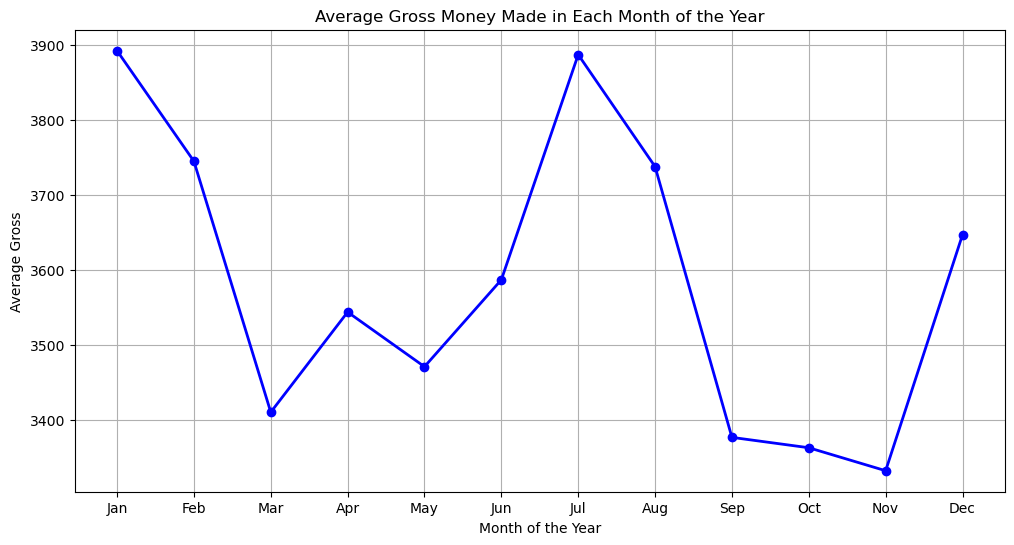

In [45]:
# Ensure the date columns are in datetime format
Contract_dfCleaned["ContractDueDate"] = pd.to_datetime(Contract_dfCleaned["ContractDueDate"], errors='coerce')

# Ensure the Gross column is numeric and handle non-numeric values
Contract_dfCleaned["Gross"] = pd.to_numeric(Contract_dfCleaned["Gross"], errors='coerce')

# Drop any rows where ContractDueDate or Gross is missing or invalid
Contract_dfCleaned = Contract_dfCleaned.dropna(subset=["ContractDueDate", "Gross"])

# Extract the month number from the ContractDueDate
Contract_dfCleaned["MonthOfYear"] = Contract_dfCleaned["ContractDueDate"].dt.month

# Group by MonthOfYear and calculate the average gross for each month
average_gross_by_month = Contract_dfCleaned.groupby("MonthOfYear")["Gross"].mean()

# Convert to numpy arrays to avoid any multi-dimensional issues
month_numbers = average_gross_by_month.index.to_numpy()
average_gross_values = average_gross_by_month.values.astype(float)

# Plot the average gross per month of the year
plt.figure(figsize=(12, 6))
plt.plot(month_numbers, average_gross_values, color="blue", marker='o', linewidth=2)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month of the Year")
plt.ylabel("Average Gross")
plt.title("Average Gross Money Made in Each Month of the Year")
plt.grid(True)
plt.show()

# **Agent Profit Amounts**

## Please look at this sql query

In [46]:


## Agent Profits by payment logs
Q1 = """
Select AgentId, GrossAmount, NetAmount, GrossAmount - NetAmount as Profit, ReceivedDate
From [dbo].[AgentPayrollLog]
"""

## Agent Total Profits
Q2 = """
Select AgentId, SUM(Profit) as TotalProfit
FROM(
Select AgentId, GrossAmount, NetAmount, GrossAmount - NetAmount as Profit, ReceivedDate
From [dbo].[AgentPayrollLog]) AS subquery
GROUP BY AgentId
Order BY AgentId;
"""

Q3 = """
Select AgentId, GrossCommissionAmount - NetCommissionAmount as CommissionProfitAmount, PostDate 
From [dbo].[PayrollPayment]
"""

## Agent TotalCommisionProfitAmount
Q4 = """
Select AgentId, SUM(CommissionProfitAmount) as TotalCommissionProfitAmount
FROM(
Select AgentId, GrossCommissionAmount - NetCommissionAmount as CommissionProfitAmount, PostDate 
From [dbo].[PayrollPayment]) as subquery
GROUP BY AgentId 
ORDER BY AgentId;
"""

## ExpensePayment
Q5 = """
Select DateIssued, PaymentAmount  
From [dbo].[ExpensePayment] 
"""

## Agent Payroll Log

In [47]:
AgentPayrollLog_df = pd.read_sql(Q1, engine)
AgentPayrollLog_df.sort_values(by='ReceivedDate', ascending=True).head(15)

,AgentId,GrossAmount,NetAmount,Profit,ReceivedDate
83,417,300.0,120.00,180.00,1988-05-16
72,163,255.0,89.25,165.75,1988-05-16
73,163,700.0,245.00,455.00,1988-05-16
74,188,500.0,200.00,300.00,1988-05-16
75,188,500.0,200.00,300.00,1988-05-16
76,264,150.0,45.00,105.00,1988-05-16
78,360,200.0,70.00,130.00,1988-05-16
79,370,600.0,180.00,420.00,1988-05-16
80,397,700.0,280.00,420.00,1988-05-16
81,417,300.0,120.00,180.00,1988-05-16


In [48]:
AgentPayrollLog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277636 entries, 0 to 277635
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   AgentId       277636 non-null  int64         
 1   GrossAmount   277636 non-null  float64       
 2   NetAmount     277636 non-null  float64       
 3   Profit        277636 non-null  float64       
 4   ReceivedDate  277636 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 10.6 MB


## Grouping by Agents Dates to get sum of the profits in the same time frame by each agent

In [49]:
# Group the DataFrame by 'ReceivedDate' and 'AgentId' to sum up the 'Profit' for each AgentId on the same date
AgentPayrollLog_df_grouped = AgentPayrollLog_df.groupby(['ReceivedDate', 'AgentId'], as_index=False)['Profit'].sum()
AgentPayrollLog_df_grouped.rename(columns={'Profit': 'TotalProfit'}, inplace=True)

AgentPayrollLog_df_grouped.sort_values(by='AgentId', ascending=True).head()

,ReceivedDate,AgentId,TotalProfit
1698,1999-05-06,0,1071.0
85050,2018-10-05,0,-50.0
1368,1999-04-14,0,455.0
562,1999-02-17,0,966.0
68425,2014-12-31,0,0.0


In [50]:
AgentPayrollLog_df_grouped.sort_values(by='AgentId', ascending=True).head()

,ReceivedDate,AgentId,TotalProfit
1698,1999-05-06,0,1071.0
85050,2018-10-05,0,-50.0
1368,1999-04-14,0,455.0
562,1999-02-17,0,966.0
68425,2014-12-31,0,0.0


In [51]:
AgentPayrollLog_df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105571 entries, 0 to 105570
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ReceivedDate  105571 non-null  datetime64[ns]
 1   AgentId       105571 non-null  int64         
 2   TotalProfit   105571 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.4 MB


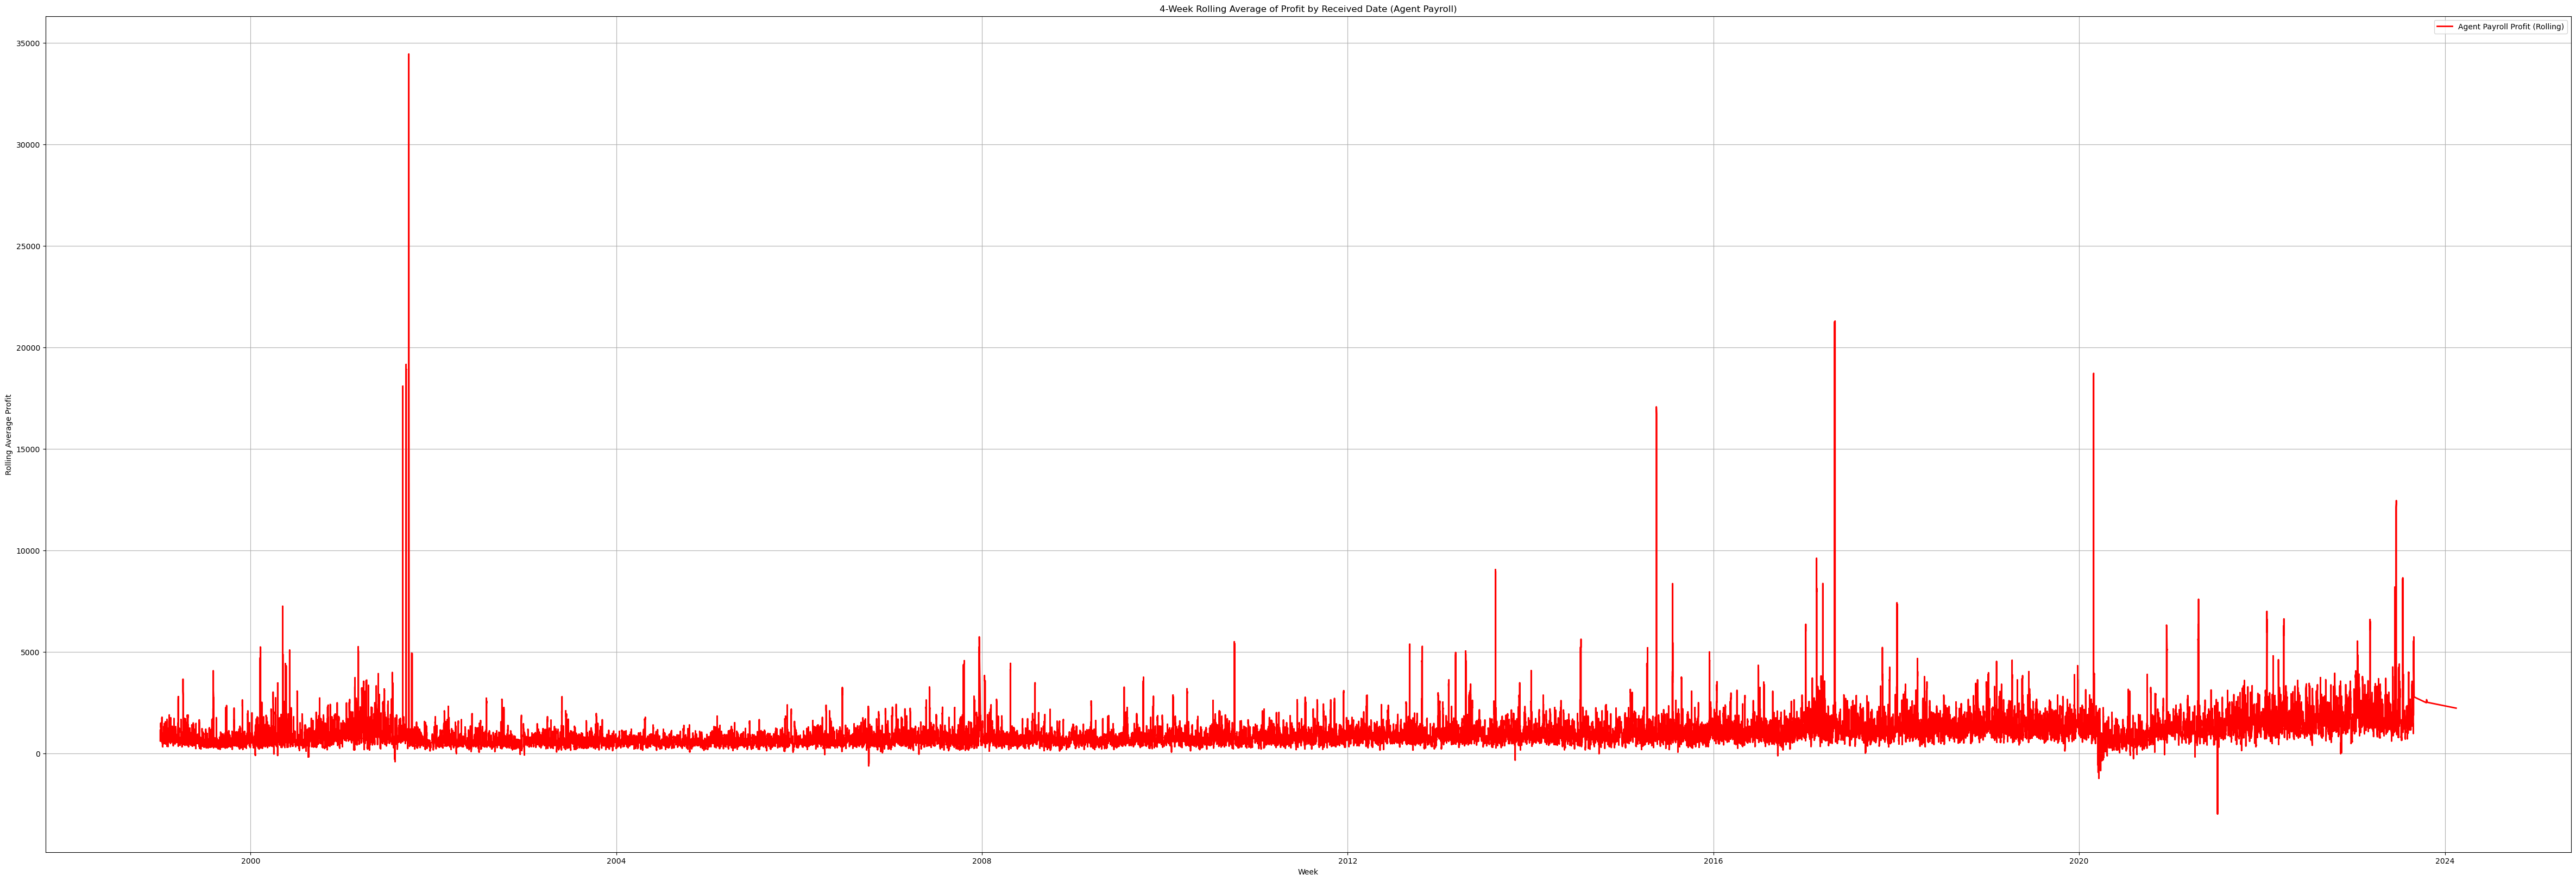

In [52]:
rolling_window = 16  # 4-week rolling window

# Step 1: Calculate rolling averages for 'profit' based on 'ReceivedDate' in AgentPayrollLog_df
agent_payroll_rolling = AgentPayrollLog_df_grouped.set_index('ReceivedDate')['TotalProfit'].rolling(window=rolling_window).mean()

# Convert to numpy arrays for plotting
dates_agent_payroll = agent_payroll_rolling.index.to_numpy()
profit_values_rolling = agent_payroll_rolling.values

# Plotting all the rolling averages
plt.figure(figsize=(60, 20))
plt.plot(dates_agent_payroll, profit_values_rolling, label="Agent Payroll Profit (Rolling)", color="red", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Profit")
plt.title("4-Week Rolling Average of Profit by Received Date (Agent Payroll)")
plt.grid(True)
plt.legend()

## Payroll Payment

In [53]:
PayrollPayment_df = pd.read_sql(Q3, engine)
PayrollPayment_df.sort_values(by='PostDate', ascending=True).head(15)

,AgentId,CommissionProfitAmount,PostDate
0,110,1054.20,1999-01-15
23,471,2670.00,1999-01-15
22,453,2517.00,1999-01-15
21,430,1185.00,1999-01-15
20,425,175.00,1999-01-15
18,417,450.00,1999-01-15
17,405,70.00,1999-01-15
16,386,4030.49,1999-01-15
15,360,633.75,1999-01-15
14,330,60.00,1999-01-15


In [54]:
PayrollPayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22506 entries, 0 to 22505
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AgentId                 22506 non-null  int64         
 1   CommissionProfitAmount  22506 non-null  float64       
 2   PostDate                22204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 527.6 KB


In [55]:
PayrollPayment_df = PayrollPayment_df.dropna()

In [56]:
PayrollPayment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22204 entries, 0 to 22466
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AgentId                 22204 non-null  int64         
 1   CommissionProfitAmount  22204 non-null  float64       
 2   PostDate                22204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 693.9 KB


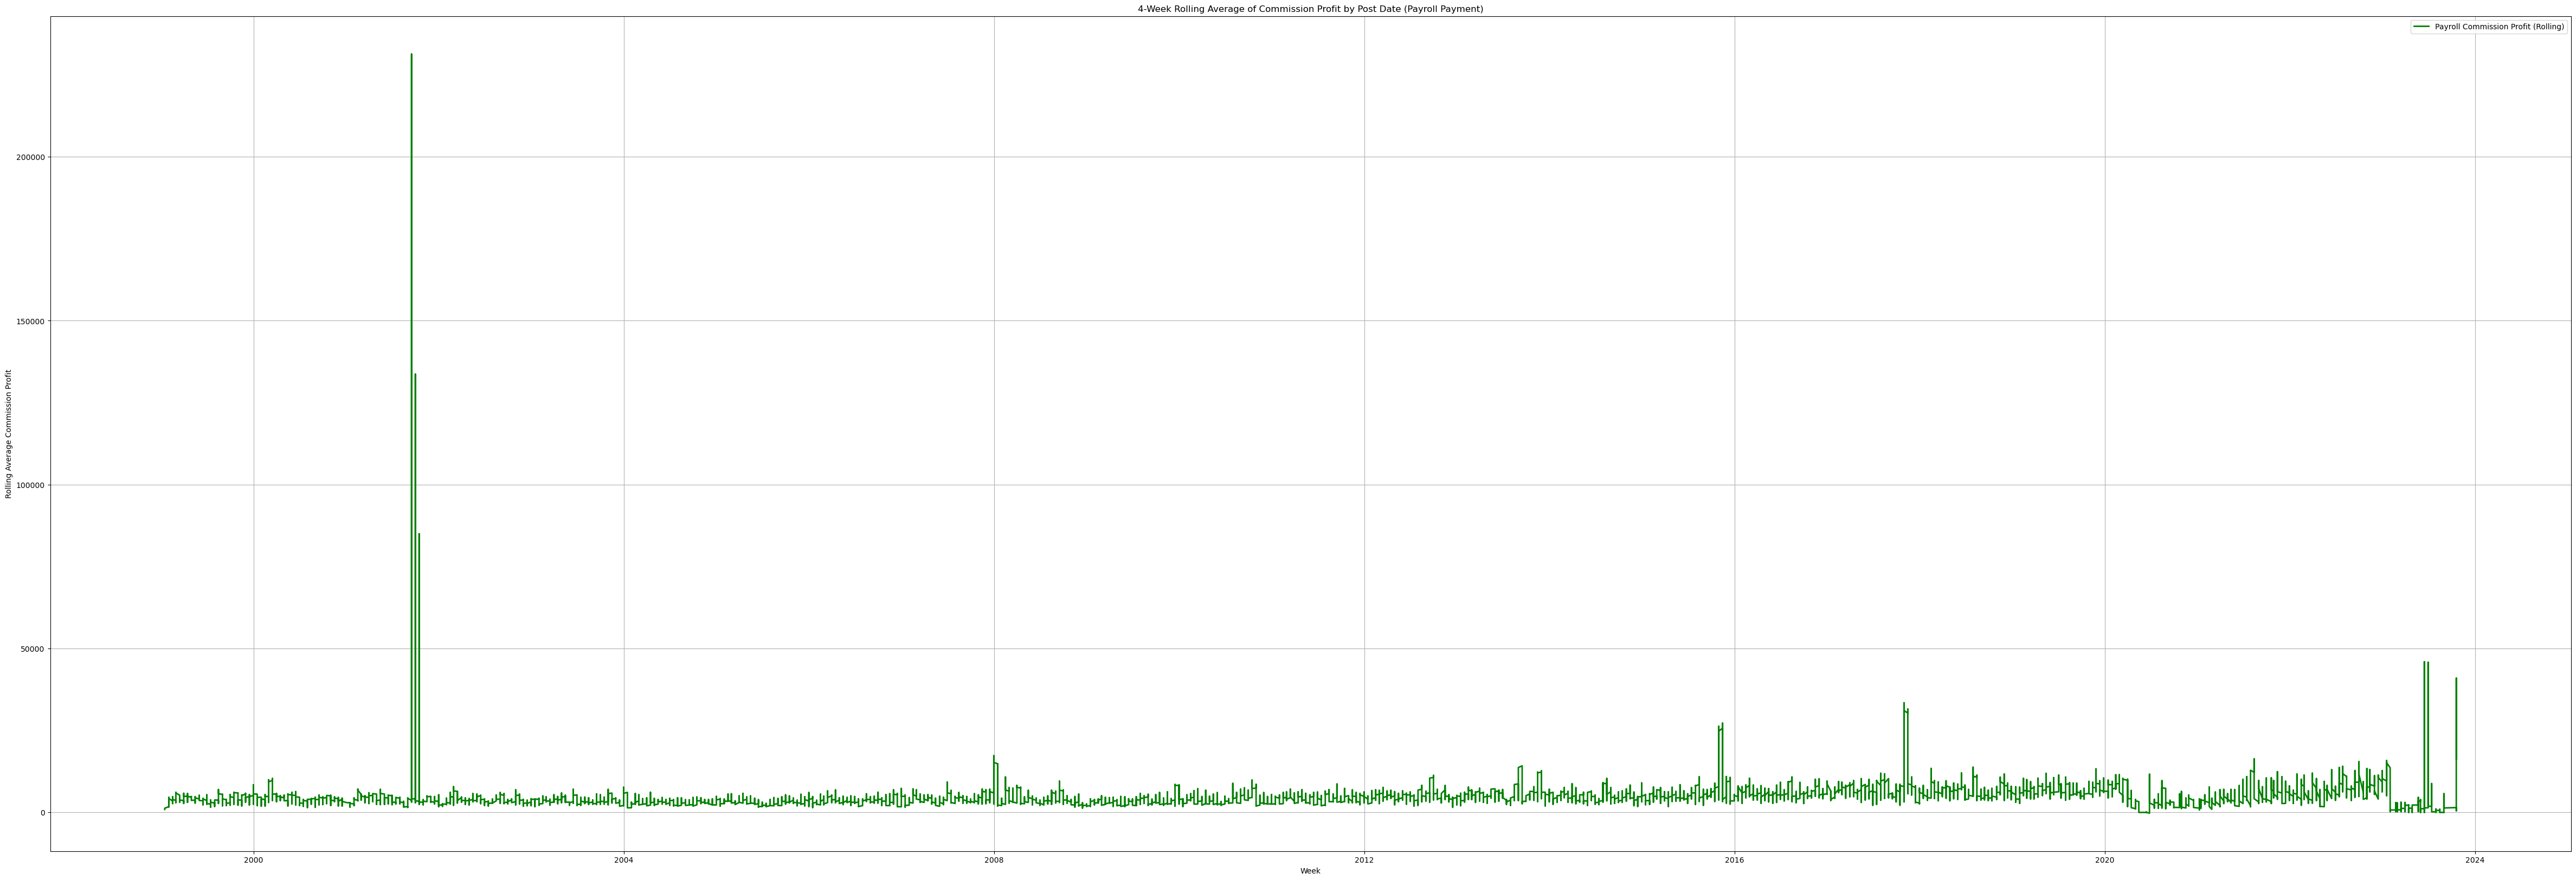

In [57]:
# Define the rolling window
rolling_window = 16  # 16-week rolling window
# Step 2: Calculate rolling averages for 'CommissionProfitAmount' based on 'PostDate' in PayrollPayment_df
payroll_payment_rolling = PayrollPayment_df.set_index('PostDate')['CommissionProfitAmount'].rolling(window=rolling_window).mean()

# Convert to numpy arrays for plotting
dates_payroll_payment = payroll_payment_rolling.index.to_numpy()
commission_values_rolling = payroll_payment_rolling.values


# Plotting all the rolling averages
plt.figure(figsize=(60, 20))
plt.plot(dates_payroll_payment, commission_values_rolling, label="Payroll Commission Profit (Rolling)", color="green", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Commission Profit")
plt.title("4-Week Rolling Average of Commission Profit by Post Date (Payroll Payment)")
plt.grid(True)
plt.legend()


## Expense Payment

In [58]:
ExpensePayment_df = pd.read_sql(Q5, engine)
ExpensePayment_df.sort_values(by='DateIssued', ascending=True).head(15)

,DateIssued,PaymentAmount
0,1998-01-02,990.00
1,1998-01-02,3250.00
2,1998-01-05,147.14
3,1998-01-05,1750.00
4,1998-01-05,1800.00
5,1998-01-05,25.00
6,1998-01-05,1350.00
7,1998-01-05,930.00
8,1998-01-05,120.00
9,1998-01-05,1750.00


In [59]:
ExpensePayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182821 entries, 0 to 182820
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateIssued     182821 non-null  datetime64[ns]
 1   PaymentAmount  182821 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 MB


## Visualizarion based on dates

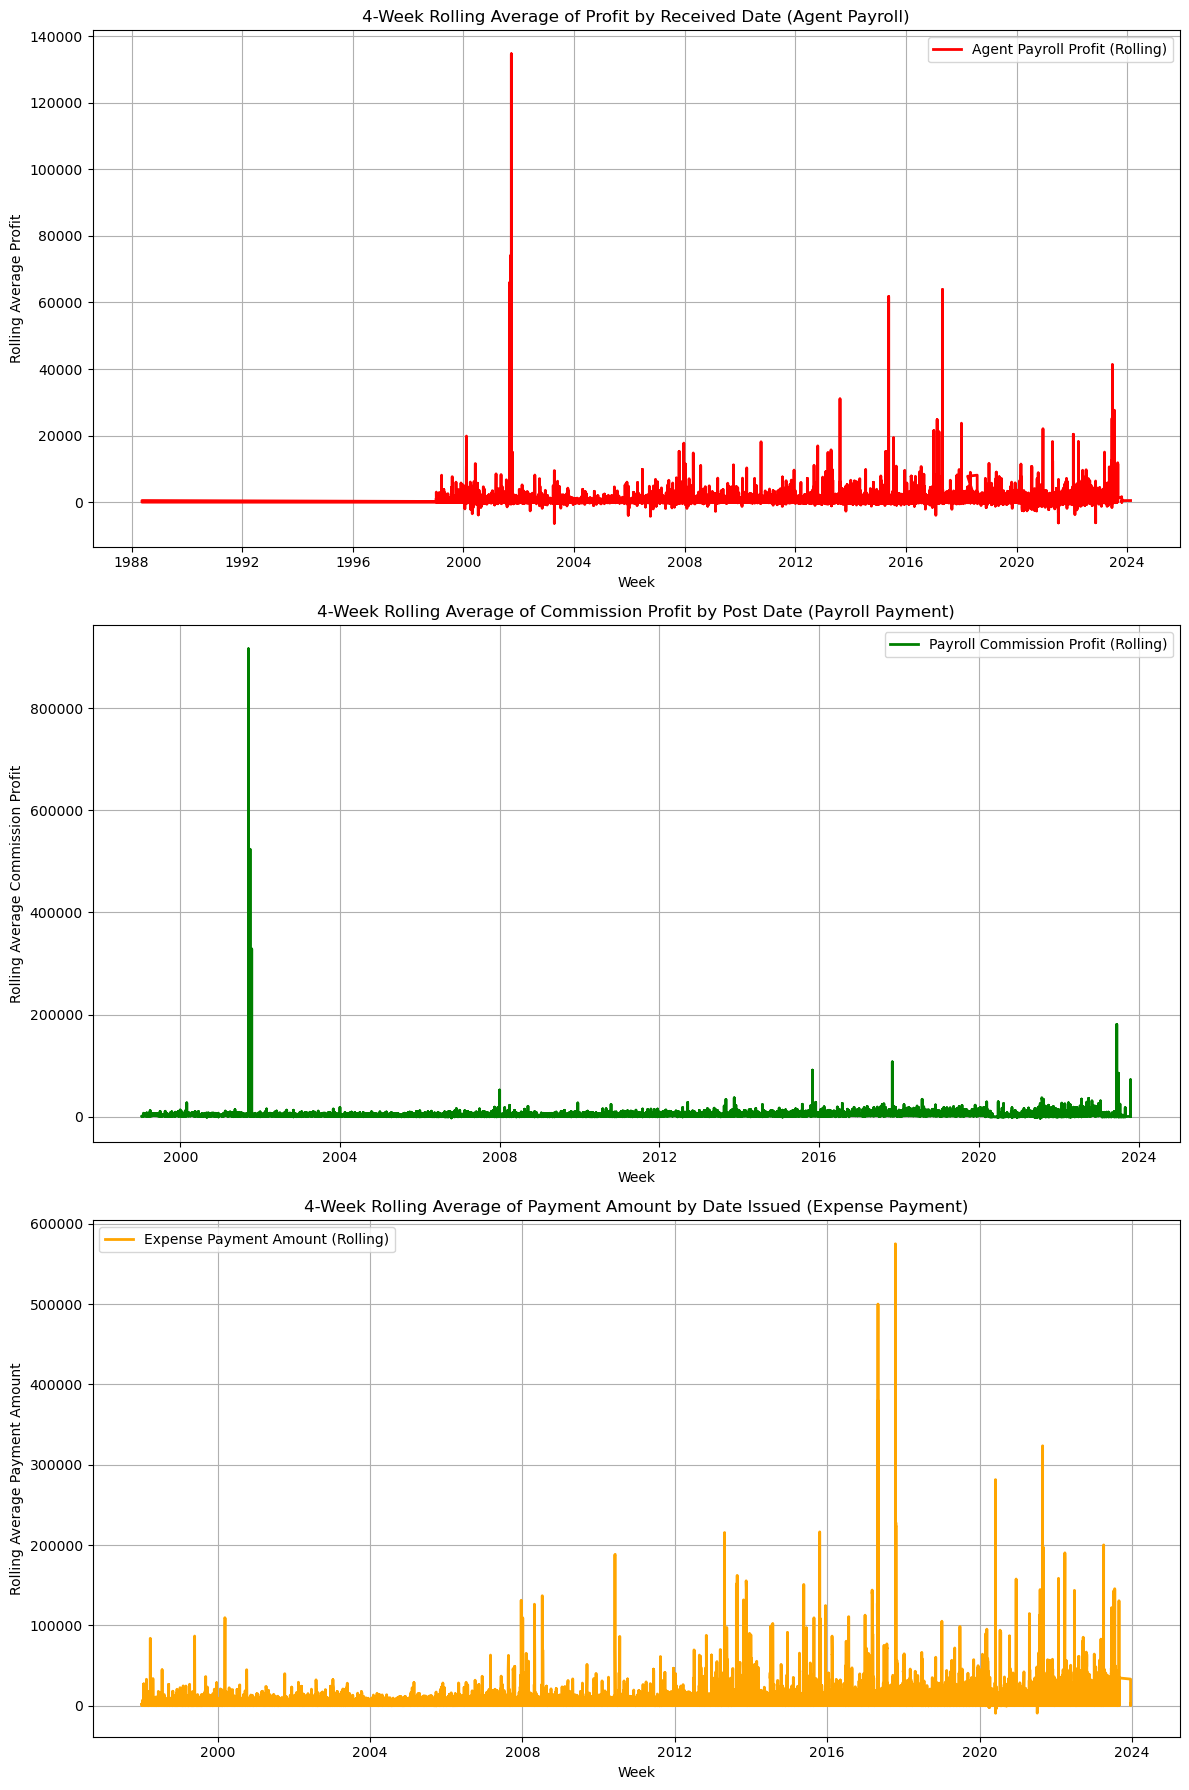

In [60]:

# Define the rolling window
rolling_window = 4  # 4-week rolling window

# Step 1: Calculate rolling averages for 'profit' based on 'ReceivedDate' in AgentPayrollLog_df
agent_payroll_rolling = AgentPayrollLog_df.set_index('ReceivedDate')['Profit'].rolling(window=rolling_window).mean()

# Convert to numpy arrays for plotting
dates_agent_payroll = agent_payroll_rolling.index.to_numpy()
profit_values_rolling = agent_payroll_rolling.values

# Step 2: Calculate rolling averages for 'CommissionProfitAmount' based on 'PostDate' in PayrollPayment_df
payroll_payment_rolling = PayrollPayment_df.set_index('PostDate')['CommissionProfitAmount'].rolling(window=rolling_window).mean()

# Convert to numpy arrays for plotting
dates_payroll_payment = payroll_payment_rolling.index.to_numpy()
commission_values_rolling = payroll_payment_rolling.values

# Step 3: Calculate rolling averages for 'PaymentAmount' based on 'DateIssued' in ExpensePayment_df
expense_payment_rolling = ExpensePayment_df.set_index('DateIssued')['PaymentAmount'].rolling(window=rolling_window).mean()

# Convert to numpy arrays for plotting
dates_expense_payment = expense_payment_rolling.index.to_numpy()
expense_values_rolling = expense_payment_rolling.values

# Plotting all the rolling averages
plt.figure(figsize=(12, 18))

# Plot for AgentPayrollLog_df
plt.subplot(3, 1, 1)
plt.plot(dates_agent_payroll, profit_values_rolling, label="Agent Payroll Profit (Rolling)", color="red", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Profit")
plt.title("4-Week Rolling Average of Profit by Received Date (Agent Payroll)")
plt.grid(True)
plt.legend()

# Plot for PayrollPayment_df
plt.subplot(3, 1, 2)
plt.plot(dates_payroll_payment, commission_values_rolling, label="Payroll Commission Profit (Rolling)", color="green", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Commission Profit")
plt.title("4-Week Rolling Average of Commission Profit by Post Date (Payroll Payment)")
plt.grid(True)
plt.legend()

# Plot for ExpensePayment_df
plt.subplot(3, 1, 3)
plt.plot(dates_expense_payment, expense_values_rolling, label="Expense Payment Amount (Rolling)", color="orange", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Rolling Average Payment Amount")
plt.title("4-Week Rolling Average of Payment Amount by Date Issued (Expense Payment)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

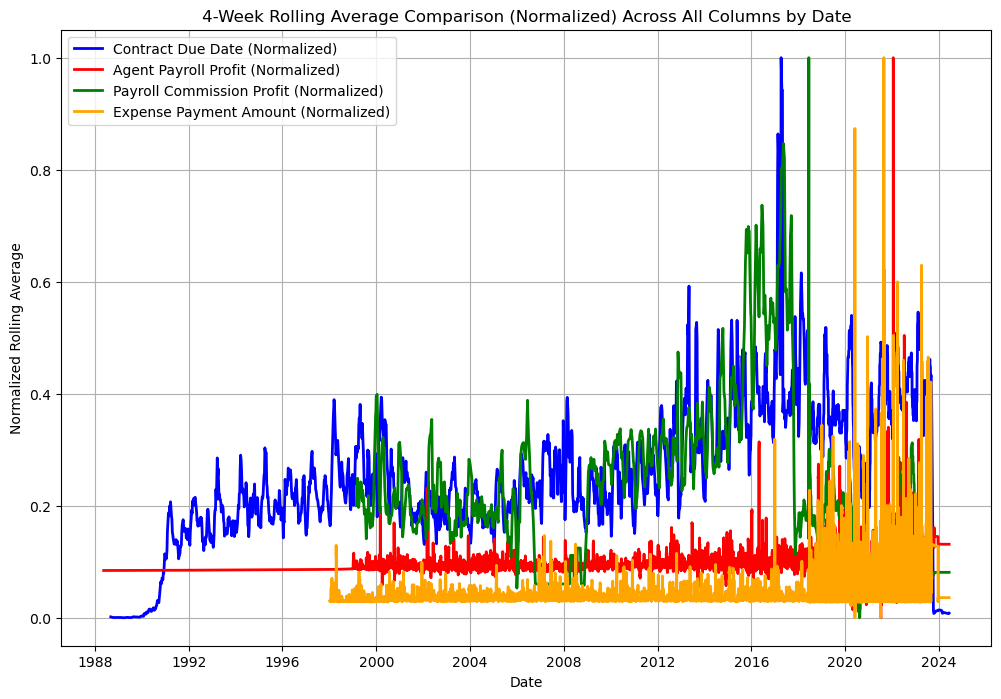

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Define the rolling window
rolling_window = 4  # 4-week rolling window

# Step 1: Remove duplicate dates in each DataFrame and calculate rolling averages
agent_payroll_rolling = AgentPayrollLog_df.drop_duplicates(subset='ReceivedDate').set_index('ReceivedDate')['Profit'].rolling(window=rolling_window).mean()
payroll_payment_rolling = PayrollPayment_df.drop_duplicates(subset='PostDate').set_index('PostDate')['CommissionProfitAmount'].rolling(window=rolling_window).mean()
expense_payment_rolling = ExpensePayment_df.drop_duplicates(subset='DateIssued').set_index('DateIssued')['PaymentAmount'].rolling(window=rolling_window).mean()
gross_by_week_due_rolling = gross_by_week_due.drop_duplicates().rolling(window=rolling_window).mean()

# Step 2: Create individual DataFrames for each rolling series
df_gross = pd.DataFrame({'Gross By Week Due': gross_by_week_due_rolling})
df_agent_payroll = pd.DataFrame({'Agent Payroll Profit': agent_payroll_rolling})
df_payroll_payment = pd.DataFrame({'Payroll Commission Profit': payroll_payment_rolling})
df_expense_payment = pd.DataFrame({'Expense Payment Amount': expense_payment_rolling})

# Step 3: Merge all DataFrames on the index (date) to align them
combined_df = pd.concat([df_gross, df_agent_payroll, df_payroll_payment, df_expense_payment], axis=1)

# Step 4: Interpolate missing values to fill gaps
combined_df = combined_df.interpolate(method='linear')

# Step 5: Apply Min-Max Scaling to normalize the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(combined_df)

# Convert index to numpy array for plotting
dates_combined = combined_df.index.to_numpy()

# Plot the normalized values
plt.figure(figsize=(12, 8))

plt.plot(dates_combined, scaled_values[:, 0], label="Contract Due Date (Normalized)", color="blue", linewidth=2)
plt.plot(dates_combined, scaled_values[:, 1], label="Agent Payroll Profit (Normalized)", color="red", linewidth=2)
plt.plot(dates_combined, scaled_values[:, 2], label="Payroll Commission Profit (Normalized)", color="green", linewidth=2)
plt.plot(dates_combined, scaled_values[:, 3], label="Expense Payment Amount (Normalized)", color="orange", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Normalized Rolling Average")
plt.title("4-Week Rolling Average Comparison (Normalized) Across All Columns by Date")
plt.grid(True)
plt.legend()
plt.show()

# **ContractArtist**

In [62]:
Query_ContractArtist = """
SELECT a.ArtistId, a.ArtistName, a.Gross AS ArtistGross, a.ContractId, 
       actt.Name AS Genre, c.ContractDueDate, c.AgentId, 
       c.VenueName, c.VenuePhysicalCity, c.Gross AS ContractGross
FROM [dbo].[ContractArtist] a
JOIN [dbo].[ArtistActType] aat ON aat.ArtistId = a.ArtistId
JOIN [dbo].[LuActType] actt ON actt.ActTypeId = aat.ActTypeId
JOIN [dbo].[Contract] c ON c.ContractId = a.ContractId
"""

In [63]:
ContractArtist_df = pd.read_sql(Query_ContractArtist, engine)
ContractArtist_df.sort_values(by='ContractDueDate', ascending=True).head(5) 

,ArtistId,ArtistName,ArtistGross,ContractId,Genre,ContractDueDate,AgentId,VenueName,VenuePhysicalCity,ContractGross
49349,13433,THE SECOND CITY - TORONTO,1850.0,152635,Comedians,1988-02-18,197,THE RED BARN THEATRE,JACKSON'S POINT,1850.0
49352,13433,THE SECOND CITY - TORONTO,3800.0,152638,Comedians,1988-02-18,197,[Unknown],[Unknown],3800.0
154286,7685,FROGMOORES,1000.0,254324,Rock,1988-02-18,425,FILL IN ______________________________________...,SPARTANBURG,1500.0
154287,1007,THE STEVE CUNNINGHAM BAND,750.0,254325,Bands,1988-02-18,360,DAVIDSON CAMPUS-THE GALLARY IN CAMBERS,DAVIDSON,1500.0
49350,13433,THE SECOND CITY - TORONTO,2500.0,152636,Comedians,1988-02-18,197,THE GRAND THEATRE,KINGSTON,2500.0


In [64]:
ContractArtist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354531 entries, 0 to 354530
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ArtistId           354531 non-null  int64         
 1   ArtistName         354531 non-null  object        
 2   ArtistGross        354531 non-null  float64       
 3   ContractId         354531 non-null  int64         
 4   Genre              354531 non-null  object        
 5   ContractDueDate    354295 non-null  datetime64[ns]
 6   AgentId            354531 non-null  int64         
 7   VenueName          354531 non-null  object        
 8   VenuePhysicalCity  354531 non-null  object        
 9   ContractGross      354524 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 27.0+ MB


In [65]:
ContractArtist_df.describe()

,ArtistId,ArtistGross,ContractId,ContractDueDate,AgentId,ContractGross
count,354531.000000,354531.000000,354531.000000,354295,3.545310e+05,3.545240e+05
mean,13433.283422,2660.460860,344144.264146,2005-03-15 19:34:15.646283392,1.417560e+04,4.126954e+03
min,2.000000,-55000.000000,100304.000000,1988-02-18 00:00:00,0.000000e+00,0.000000e+00
25%,1415.000000,600.000000,185983.500000,1996-10-05 00:00:00,2.030000e+02,1.000000e+03
50%,6542.000000,1400.000000,274486.000000,2003-03-18 00:00:00,3.130000e+02,2.000000e+03
75%,16655.000000,3000.000000,354596.500000,2013-09-30 00:00:00,4.170000e+02,4.100000e+03
max,104196.000000,1000000.000000,847752.000000,2024-07-20 00:00:00,1.000457e+06,4.800000e+06
std,20423.573292,7173.067516,226201.850074,NaN,1.169417e+05,1.876342e+04


In [66]:
ContractArtist_df.dropna()

,ArtistId,ArtistName,ArtistGross,ContractId,Genre,ContractDueDate,AgentId,VenueName,VenuePhysicalCity,ContractGross
0,15330,THE WRINKLES,1700.0,100304,Rock,2001-11-17,0,CASTAWAY,RICHMOND,1700.0
1,15330,THE WRINKLES,1700.0,100304,Bands,2001-11-17,0,CASTAWAY,RICHMOND,1700.0
2,2267,RICK & DANNY TRIO,500.0,101731,Bands,1989-02-10,419,"DAYS INN, 5221 BROOK ROAD, RICHMOND, VIRGINIA",RICHMOND,550.0
3,2732,KAHOOTZ,2000.0,103324,Rock,1989-05-05,0,GODFATHER LOUNGE,COLONIAL HEIGHTS,2000.0
4,928,USUALS,1150.0,103331,Rock,1989-05-13,313,"KAPPA SIGMA FRATERNITY, WASHINGTON & LEE UNIVE...",LEXINGTON,1500.0
...,...,...,...,...,...,...,...,...,...,...
354526,104196,Test Artist 2,1400.0,847750,Classical,2024-06-07,3,Frederica Golf Club,Saint Simons Island,2000.0
354527,104196,Test Artist 2,1400.0,847750,International,2024-06-07,3,Frederica Golf Club,Saint Simons Island,2000.0
354528,920,CHI-LITES,7200.0,847751,Nationals,2024-06-07,3,Brittland Estates,Chestertown,9000.0
354529,104196,Test Artist 2,1400.0,847752,Classical,2024-06-20,3,venues test,Mid Town Raleigh,2000.0


# **ContractArtistEventDate**

In [67]:
Query_ContractArtistEventDate = """
Select ContractArtistEventDateId, ContractArtistId, ContractEventDateId, MigContractHours 
From [dbo].[ContractArtistEventDate]
"""

In [68]:
ContractArtistEventDate_df = pd.read_sql(Query_ContractArtistEventDate, engine)
ContractArtistEventDate_df.head(5) 

,ContractArtistEventDateId,ContractArtistId,ContractEventDateId,MigContractHours
0,1,11220,16769,7:00 PM - 8:00 PM
1,2,16775,16787,9:00 PM - 1:00 AM
2,3,13801,16790,9:00PM - 1:00AM
3,4,13971,16805,9:30PM - 12:30AM
4,5,16562,16806,9:30PM - 12:30 AM


In [69]:
ContractArtistEventDate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354025 entries, 0 to 354024
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ContractArtistEventDateId  354025 non-null  int64 
 1   ContractArtistId           354025 non-null  int64 
 2   ContractEventDateId        354025 non-null  int64 
 3   MigContractHours           322865 non-null  object
dtypes: int64(3), object(1)
memory usage: 10.8+ MB


In [70]:
ContractArtistEventDate_df.describe()

,ContractArtistEventDateId,ContractArtistId,ContractEventDateId
count,354025.000000,354025.000000,354025.000000
mean,177502.741117,150475.418792,178287.193786
std,102987.688562,88262.585181,103226.262082
min,1.000000,1.000000,1.000000
25%,88507.000000,77176.000000,88717.000000
50%,177013.000000,147920.000000,178290.000000
75%,265536.000000,226712.000000,267033.000000
max,365697.000000,314345.000000,363924.000000


# **ContractEventDate**

In [71]:
Query_ContractEventDate = """
WITH ContractEventDateGrouped AS (
    SELECT
        ContractEventDateId,
        ContractId,
        EventDate,
        LAG(EventDate) OVER (PARTITION BY ContractId ORDER BY EventDate) AS PreviousEventDate
    FROM
        ContractEventDate
)
SELECT
    ContractId,
    MIN(EventDate) AS EarliestDate,
    MAX(EventDate) AS LatestDate
FROM
    ContractEventDateGrouped
WHERE
    PreviousEventDate IS NOT NULL
    AND DATEDIFF(day, PreviousEventDate, EventDate) > 1  -- Identify gaps greater than 1 day
GROUP BY
    ContractId
ORDER BY
    ContractId;
"""

In [72]:
ContractEventDate_df = pd.read_sql(Query_ContractEventDate, engine)
ContractEventDate_df.head(5) 

,ContractId,EarliestDate,LatestDate
0,107273,1990-11-02,1990-11-02
1,107274,1990-12-14,1990-12-14
2,108284,1991-01-02,1991-01-02
3,109057,1990-06-23,1990-06-23
4,109421,1990-12-09,1990-12-30


In [73]:
ContractEventDate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ContractId    3635 non-null   int64 
 1   EarliestDate  3635 non-null   object
 2   LatestDate    3635 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.3+ KB


In [74]:
ContractEventDate_df.describe()

,ContractId
count,3635.000000
mean,428102.817331
std,277823.580366
min,107273.000000
25%,207016.500000
50%,286353.000000
75%,813953.000000
max,843734.000000


# **ContractTransaction**

In [75]:
Query_ContractTransaction = """
Select ContractId, AgentId, ArtistId, OfficeId, ContractTransactionTypeId, PayeeName, IsExpense, RequiredAmount, RequiredPercentage, PaidAmount
From [dbo].[ContractTransaction]
"""

In [76]:
ContractTransaction_df = pd.read_sql(Query_ContractTransaction, engine)
ContractTransaction_df.head(5) 

,ContractId,AgentId,ArtistId,OfficeId,ContractTransactionTypeId,PayeeName,IsExpense,RequiredAmount,RequiredPercentage,PaidAmount
0,103619,177,NaN,1.0,33,NO RESELLER,True,0.0,0.0,0.0
1,108723,177,125.0,1.0,10,KRAKAJAX,False,0.0,0.0,0.0
2,108723,177,NaN,1.0,8,EASTCOAST ENT.,True,202.5,100.0,202.5
3,108723,177,NaN,1.0,8,EASTCOAST ENT.,True,-202.5,0.0,-202.5
4,122544,405,6720.0,1.0,10,BILL HALE,False,0.0,0.0,0.0


In [77]:
ContractTransaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988280 entries, 0 to 988279
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ContractId                 988280 non-null  int64  
 1   AgentId                    988280 non-null  int64  
 2   ArtistId                   329252 non-null  float64
 3   OfficeId                   988268 non-null  float64
 4   ContractTransactionTypeId  988280 non-null  int64  
 5   PayeeName                  988280 non-null  object 
 6   IsExpense                  988280 non-null  bool   
 7   RequiredAmount             988280 non-null  float64
 8   RequiredPercentage         988251 non-null  float64
 9   PaidAmount                 988280 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 68.8+ MB


In [78]:
ContractTransaction_df.describe()

,ContractId,AgentId,ArtistId,OfficeId,ContractTransactionTypeId,RequiredAmount,RequiredPercentage,PaidAmount
count,988280.000000,9.882800e+05,3.292520e+05,988268.000000,988280.000000,9.882800e+05,988251.000000,9.882800e+05
mean,414879.793375,2.091079e+04,1.903410e+04,6.947029,8.569876,1.070183e+03,21.464261,1.039833e+03
std,248263.862551,1.420420e+05,8.286512e+04,4.623125,7.009790,7.631004e+03,39.590679,6.981064e+03
min,103619.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,-6.000000e+05,0.000000,-6.000000e+05
25%,255011.000000,2.130000e+02,3.362000e+03,4.000000,7.000000,5.000000e+01,0.000000,5.000000e+01
50%,331635.500000,3.280000e+02,1.440200e+04,6.000000,8.000000,2.450000e+02,0.000000,2.250000e+02
75%,800867.250000,4.170000e+02,1.936700e+04,11.000000,10.000000,1.000000e+03,0.000000,1.000000e+03
max,847752.000000,1.000457e+06,9.190000e+06,22.000000,100.000000,2.800000e+06,100.000000,2.800000e+06


# **Queries related to tables for EDA focused on Analysis with amount**

#### Understanding the AgentPayrolllog
- Select * from [dbo].[AgentPayrollLog]


- Select AgentId, Sum(GrossAmount) as SumGrossAmount, Sum(NetAmount) as SumNetAmount, Avg(NetAmount) as AvgNetAmount
- From [dbo].[AgentPayrollLog]
- Group By AgentId
- Order By AgentId

#### The Payrol table helps understand payment for Agents

- Select * From [dbo].[PayrollPayment]

#### What is the difference between gross and net commission
#### This Query helps us in telling about the payroll for agents
- Select AgentId, Sum(GrossCommissionAmount) as GrossCommision, Sum(NetCommissionAmount) as NetCommission 
- From [dbo].[PayrollPayment]
- Group By AgentId
- Order By Agentid



#### Understanding the contract transactions
- Select * from [dbo].[ContractTransaction]

- Select a.ContractTransactionId, a.ContractId, a.AgentId, a.ArtistId, a.RequiredAmount, a.PaidAmount
- From [dbo].[ContractTransaction] as a

#### Understanding the ContractId's significance.
Select * From [dbo].[Contract]

#### Gross  for contract Group by Agent
- Select AgentId , Sum(Gross) as Gross
- From [dbo].[Contract]
- Group By AgentId
- Order by AgentId

#### Gross for contract by Office
- Select OfficeId , Sum(Gross) as Gross
- From [dbo].[Contract]
- Group By OfficeId
- Order by OfficeId

#### Gross for Contract by LeadSource
- Select LeadSourceId , Sum(Gross) as Gross
- From [dbo].[Contract]
- Group By LeadSourceId
- Order by LeadSourceId


#### Gross for Contract by Presenter
- Select PresenterId , Sum(Gross) as Gross
- From [dbo].[Contract]
- Group By PresenterId
- Order by PresenterId

Select * From [dbo].[LuLineOfBusiness]

Select * From [dbo].[LuContractStatus]

Select * From [dbo].[LuLeadSource]

Select * From [dbo].[LuContractType]

Select * From [dbo].[LuEventType]

Select * From [dbo].[LuPresenterType]